## 1. Introdução e Objetivos

### 1.1 Contexto do Projeto

Este projeto tem como objetivo aplicar técnicas de **Machine Learning** para análise do World Happiness Report, um conjunto de dados que mensura a felicidade de países ao redor do mundo com base em diversos indicadores socioeconômicos.

### 1.2 Objetivos Específicos

O projeto visa colocar em prática as seguintes habilidades:

1. **Análise Exploratória de Dados (EDA)**:
   - Limpeza e tratamento de dados ausentes
   - Investigação das relações entre variáveis dependentes e independentes
   - Visualização de distribuições e correlações

2. **Modelagem Preditiva - Regressão**:
   - Regressão Linear Simples
   - Regressão Linear Múltipla
   - Regressão Polinomial

3. **Modelagem Preditiva - Classificação**:
   - Naive Bayes
   - Regressão Logística

4. **Avaliação de Modelos**:
   - Métricas de regressão: MAE, RMSE, R²
   - Métricas de classificação: Accuracy, Precision, Recall, F1-Score, AUC-ROC
   - Diagnóstico de resíduos e validação de suposições

5. **Otimização**:
   - Validação cruzada
   - Tuning de hiperparâmetros (Grid Search, Random Search)
   - Comparação sistemática de modelos com visualizações customizadas

### 1.3 Hipóteses de Negócio

**Variável-Alvo Principal:** `Happiness Score` (Regressão)

**Hipóteses a serem investigadas:**
1. O PIB per capita (Economy) é o principal preditor do score de felicidade?
2. Países com maior expectativa de vida (Health) tendem a ser mais felizes?
3. Liberdade e confiança no governo têm impacto significativo na felicidade?
4. Existe correlação forte entre suporte familiar (Family) e felicidade?
5. É possível classificar países em categorias de felicidade com alta precisão?

---

## 2. Fonte de Dados e Licença

### 2.1 Descrição do Dataset

**Nome:** World Happiness Report  
**Fonte:** [Kaggle - World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness)  
**Período:** 2015-2022  
**Licença:** CC0: Public Domain  

### 2.2 Estrutura dos Dados

O dataset contém **1.231 registros** e **14 variáveis**:

- **Country:** Nome do país
- **Region:** Região geográfica
- **Happiness Rank:** Ranking de felicidade
- **Happiness Score:** Score de felicidade (0-10) - **VARIÁVEL ALVO**
- **Standard Error:** Erro padrão da medição
- **Economy (GDP per Capita):** Contribuição do PIB per capita
- **Family:** Contribuição do suporte social/familiar
- **Health (Life Expectancy):** Contribuição da expectativa de vida
- **Freedom:** Contribuição da liberdade de escolha
- **Trust (Government Corruption):** Contribuição da confiança no governo
- **Generosity:** Contribuição da generosidade
- **Dystopia Residual:** Resíduo em relação a um país distópico hipotético
- **year:** Ano da coleta

### 2.3 Ética e Uso de Dados

Este projeto utiliza dados públicos e respeitará:
- Transparência nas metodologias aplicadas
- Documentação clara de todas as decisões e transformações
- Discussão sobre possíveis vieses e limitações
- Reprodutibilidade através de seeds aleatórias fixas

---

## 3. Configuração do Ambiente

### 3.1 Importação de Bibliotecas

In [ ]:
# Configuração de reprodutibilidade
import random
import numpy as np

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Supressão de avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Configuração do tamanho padrão dos gráficos
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Bibliotecas de manipulação e visualização carregadas")

✓ Bibliotecas de manipulação e visualização carregadas


In [ ]:
# Modelagem estatística
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Testes estatísticos
from scipy import stats
from scipy.stats import normaltest, shapiro, kstest

print("✓ Bibliotecas estatísticas carregadas")

✓ Bibliotecas estatísticas carregadas


In [ ]:
# Scikit-learn - Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.impute import SimpleImputer

# Scikit-learn - Modelos de Regressão
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# Scikit-learn - Modelos de Classificação
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Scikit-learn - Métricas
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

print("✓ Scikit-learn carregado")

✓ Scikit-learn carregado


In [ ]:
# PyCaret
from pycaret.regression import *
from pycaret.classification import *

print("✓ PyCaret carregado")

### 3.2 Carregamento dos Dados

In [ ]:
# Carregar dataset
df = pd.read_csv('world_happiness_report.csv')

print(f"Dataset carregado com sucesso!")
print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"Período: {df['year'].min()} - {df['year'].max()}")

Dataset carregado com sucesso!
Dimensões: 1231 linhas x 14 colunas
Período: 2015 - 2022


### 3.3 Teste de Schema (Validação Automatizada)

In [ ]:
# Teste automatizado: verificação de schema
expected_columns = [
    'Country', 'Region', 'Happiness Rank', 'Happiness Score', 
    'Standard Error', 'Economy (GDP per Capita)', 'Family', 
    'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 
    'Generosity', 'Dystopia Residual', 'year'
]

# Verificar colunas esperadas
actual_columns = [col for col in df.columns if col != 'Unnamed: 0']
missing_columns = set(expected_columns) - set(actual_columns)
extra_columns = set(actual_columns) - set(expected_columns)

if not missing_columns and not extra_columns:
    print("✓ TESTE PASSOU: Schema do dataset está correto")
else:
    if missing_columns:
        print(f"⚠ AVISO: Colunas faltando: {missing_columns}")
    if extra_columns:
        print(f"⚠ AVISO: Colunas extras: {extra_columns}")

# Verificar tipos esperados
assert df['Happiness Score'].dtype in [np.float64, np.float32], "Happiness Score deve ser numérico"
assert df['year'].dtype in [np.int64, np.int32], "Year deve ser inteiro"

print("✓ TESTE PASSOU: Tipos de dados estão corretos")
print("\n" + "="*60)
print("AMBIENTE CONFIGURADO E VALIDADO COM SUCESSO!")
print("="*60)

✓ TESTE PASSOU: Schema do dataset está correto
✓ TESTE PASSOU: Tipos de dados estão corretos

AMBIENTE CONFIGURADO E VALIDADO COM SUCESSO!


## 4. Análise Exploratória de Dados (EDA)

### 4.1 Visão Geral dos Dados

In [ ]:
# Primeiras linhas do dataset
print("="*60)
print("PRIMEIRAS 5 LINHAS DO DATASET")
print("="*60)
df.head()

PRIMEIRAS 5 LINHAS DO DATASET


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [ ]:
# Informações gerais do dataset
print("="*60)
print("INFORMAÇÕES GERAIS")
print("="*60)
df.info()
print("\n" + "="*60)
print(f"Total de países únicos: {df['Country'].nunique()}")
print(f"Total de regiões: {df['Region'].nunique()}")
print(f"Anos disponíveis: {sorted(df['year'].unique())}")

INFORMAÇÕES GERAIS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual            

In [ ]:
# Estatísticas descritivas
print("="*60)
print("ESTATÍSTICAS DESCRITIVAS")
print("="*60)
df.describe().round(3)

ESTATÍSTICAS DESCRITIVAS


,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000,315.000,315.000,158.000,315.000,470.000,315.000,470.000,315.000,1084.000,315.000,1231.000
mean,615.000,79.238,5.379,0.048,0.900,0.990,0.594,0.403,0.141,0.154,2.212,2018.450
std,355.503,45.539,1.142,0.017,0.411,0.319,0.241,0.150,0.115,0.168,0.559,2.284
min,0.000,1.000,2.839,0.018,0.000,0.000,0.000,0.000,0.000,-0.301,0.329,2015.000
25%,307.500,40.000,4.510,0.037,0.595,0.793,0.420,0.298,0.061,0.065,1.884,2016.000
50%,615.000,79.000,5.286,0.044,0.973,1.026,0.640,0.418,0.106,0.162,2.211,2018.000
75%,922.500,118.500,6.269,0.052,1.229,1.229,0.788,0.517,0.179,0.252,2.563,2020.000
max,1230.000,158.000,7.587,0.137,1.824,1.611,1.025,0.670,0.552,0.838,3.838,2022.000


### 4.2 Tratamento de Dados Ausentes e Inconsistências

In [ ]:
# Verificar valores ausentes
print("="*60)
print("ANÁLISE DE VALORES AUSENTES")
print("="*60)

missing_data = pd.DataFrame({
    'Coluna': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print("\nColunas com valores ausentes:")
    print(missing_data.to_string(index=False))
else:
    print("\n✓ Nenhum valor ausente encontrado!")

# Verificar duplicatas
duplicates = df.duplicated().sum()
print(f"\n{'='*60}")
print(f"Total de linhas duplicadas: {duplicates}")

if duplicates > 0:
    print(f"⚠ Removendo {duplicates} duplicatas...")
    df = df.drop_duplicates()
    print("✓ Duplicatas removidas!")
else:
    print("✓ Nenhuma duplicata encontrada!")

ANÁLISE DE VALORES AUSENTES

Colunas com valores ausentes:
                       Coluna  Missing_Count  Missing_Percent
               Standard Error           1073            87.16
                       Region            916            74.41
              Happiness Score            916            74.41
               Happiness Rank            916            74.41
            Dystopia Residual            916            74.41
     Economy (GDP per Capita)            916            74.41
     Health (Life Expectancy)            916            74.41
Trust (Government Corruption)            916            74.41
                      Freedom            761            61.82
                       Family            761            61.82
                      Country            614            49.88
                   Generosity            147            11.94

Total de linhas duplicadas: 0
✓ Nenhuma duplicata encontrada!


In [ ]:
# Remover coluna Unnamed: 0 se existir
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("✓ Coluna 'Unnamed: 0' removida")

# Criar cópia para análise
df_clean = df.copy()

print("\n" + "="*60)
print(f"Dataset limpo: {df_clean.shape[0]} linhas x {df_clean.shape[1]} colunas")
print("="*60)

✓ Coluna 'Unnamed: 0' removida

Dataset limpo: 1231 linhas x 13 colunas


### 4.3 Análise de Outliers

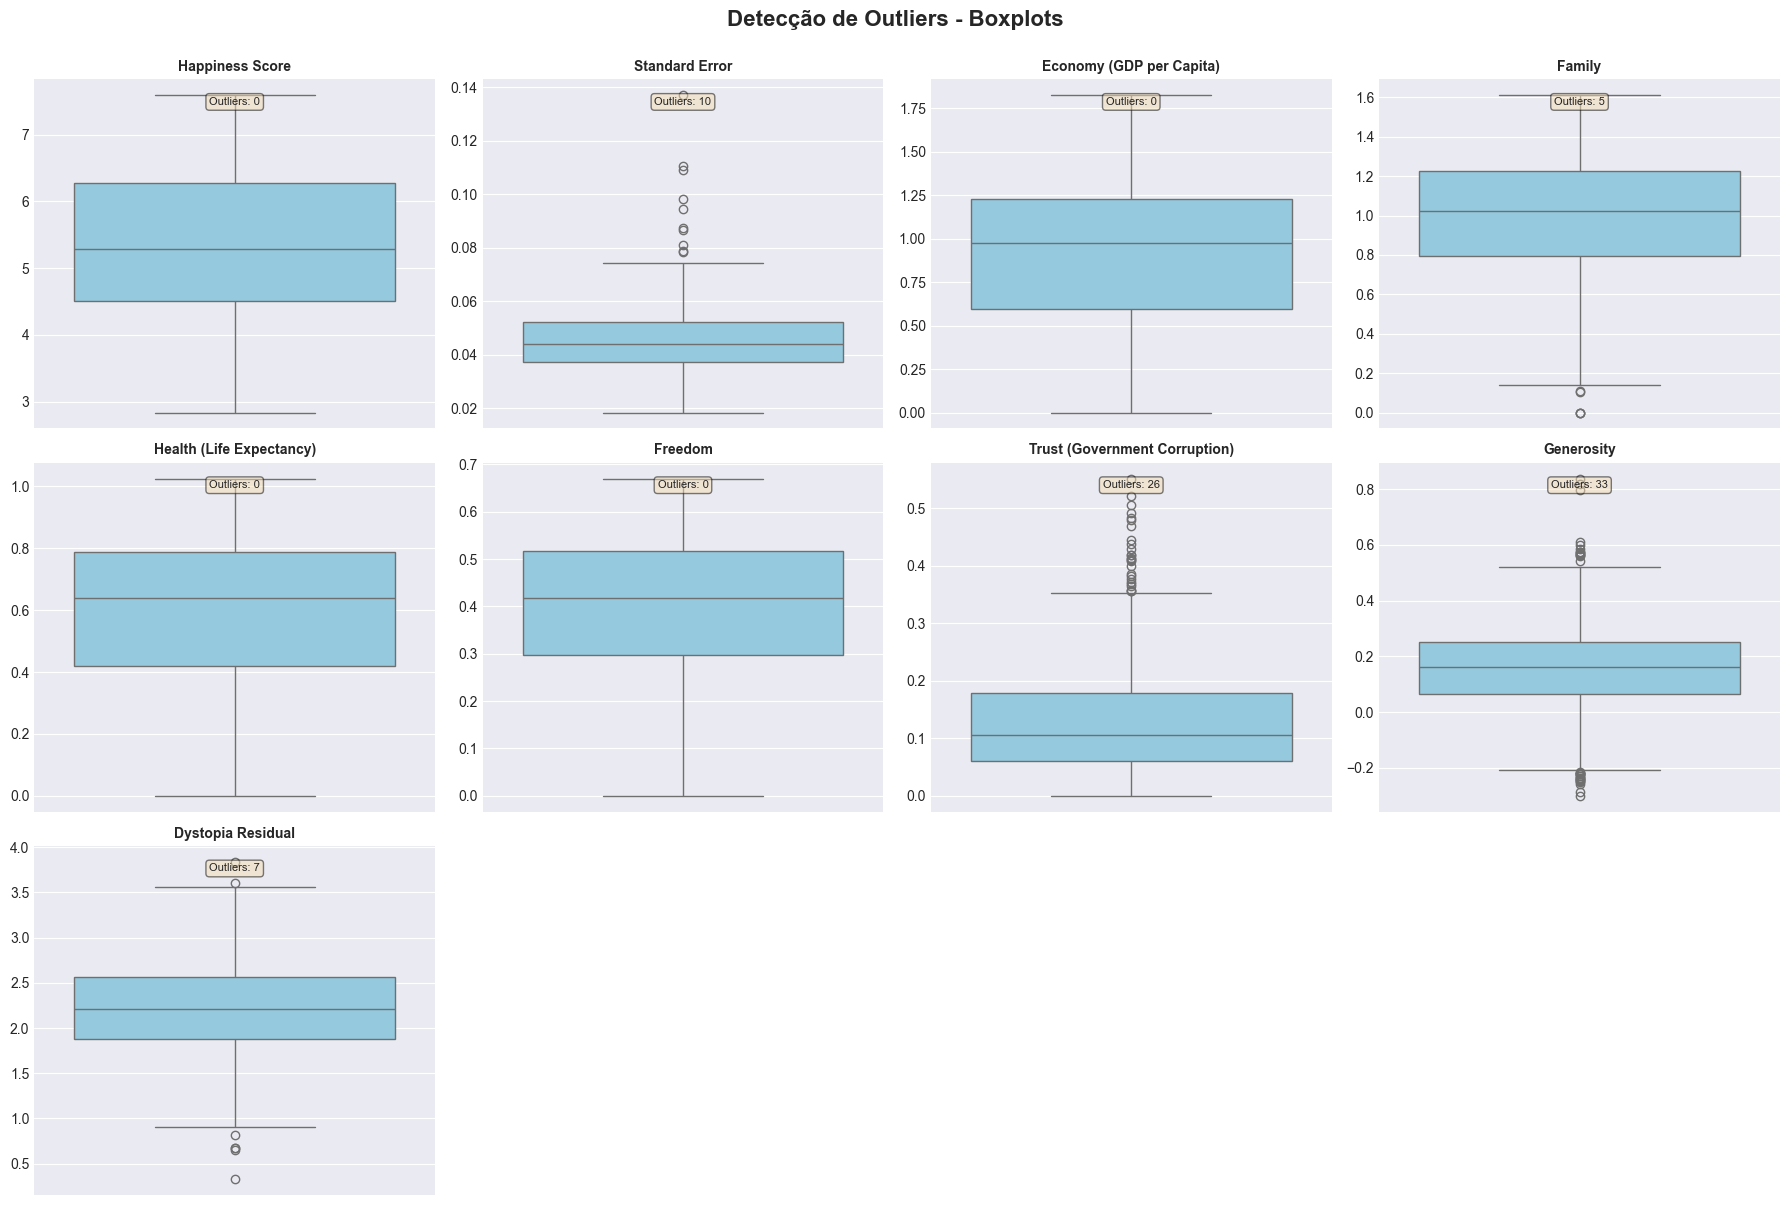

DECISÃO: Manter outliers por serem valores legítimos representando
diferenças reais entre países (ex: países muito ricos ou muito pobres)


In [ ]:
# Selecionar apenas colunas numéricas para análise de outliers
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Happiness Rank', 'year']]

# Boxplots para detectar outliers
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        sns.boxplot(data=df_clean, y=col, ax=axes[idx], color='skyblue')
        axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('')
        
        # Calcular número de outliers usando IQR
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df_clean[col] < (Q1 - 1.5 * IQR)) | (df_clean[col] > (Q3 + 1.5 * IQR))).sum()
        axes[idx].text(0.5, 0.95, f'Outliers: {outliers}', 
                      transform=axes[idx].transAxes, 
                      ha='center', va='top', fontsize=8, 
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remover subplots extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Detecção de Outliers - Boxplots', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("="*60)
print("DECISÃO: Manter outliers por serem valores legítimos representando")
print("diferenças reais entre países (ex: países muito ricos ou muito pobres)")
print("="*60)

### 4.4 Visualizações e Distribuições

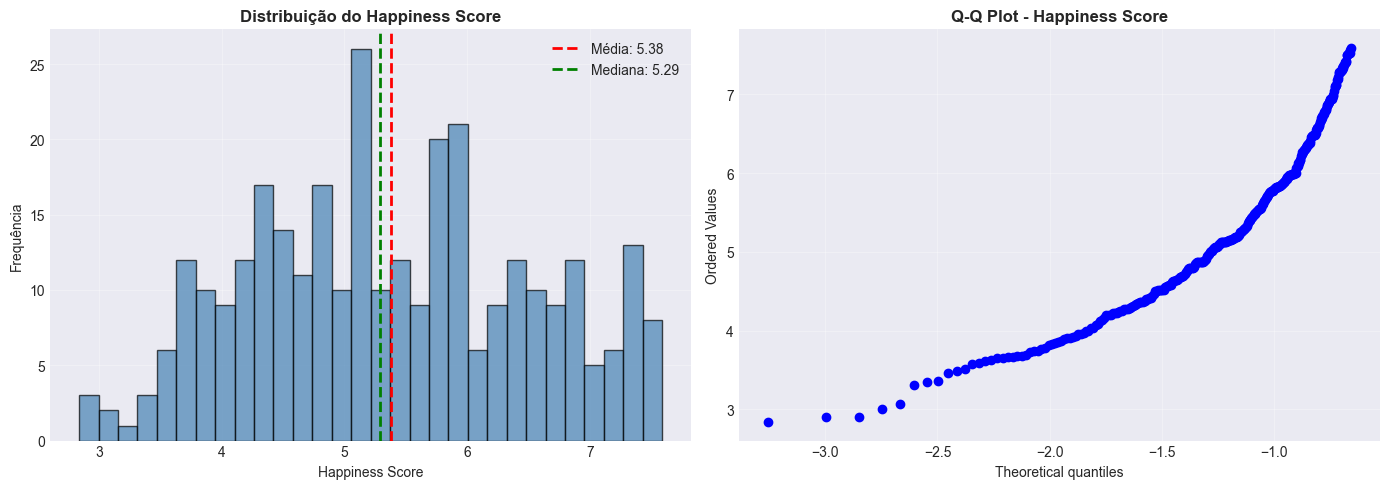

TESTE DE NORMALIDADE - SHAPIRO-WILK
Estatística: nan
P-valor: nan
⚠ Distribuição não é normal (p <= 0.05)


In [ ]:
# Distribuição da variável alvo: Happiness Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df_clean['Happiness Score'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df_clean['Happiness Score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df_clean["Happiness Score"].mean():.2f}')
axes[0].axvline(df_clean['Happiness Score'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df_clean["Happiness Score"].median():.2f}')
axes[0].set_xlabel('Happiness Score')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição do Happiness Score', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Q-Q Plot para normalidade
stats.probplot(df_clean['Happiness Score'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot - Happiness Score', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Teste de normalidade
statistic, p_value = shapiro(df_clean['Happiness Score'])
print("="*60)
print("TESTE DE NORMALIDADE - SHAPIRO-WILK")
print("="*60)
print(f"Estatística: {statistic:.4f}")
print(f"P-valor: {p_value:.4f}")
if p_value > 0.05:
    print("✓ Distribuição é aproximadamente normal (p > 0.05)")
else:
    print("⚠ Distribuição não é normal (p <= 0.05)")
print("="*60)

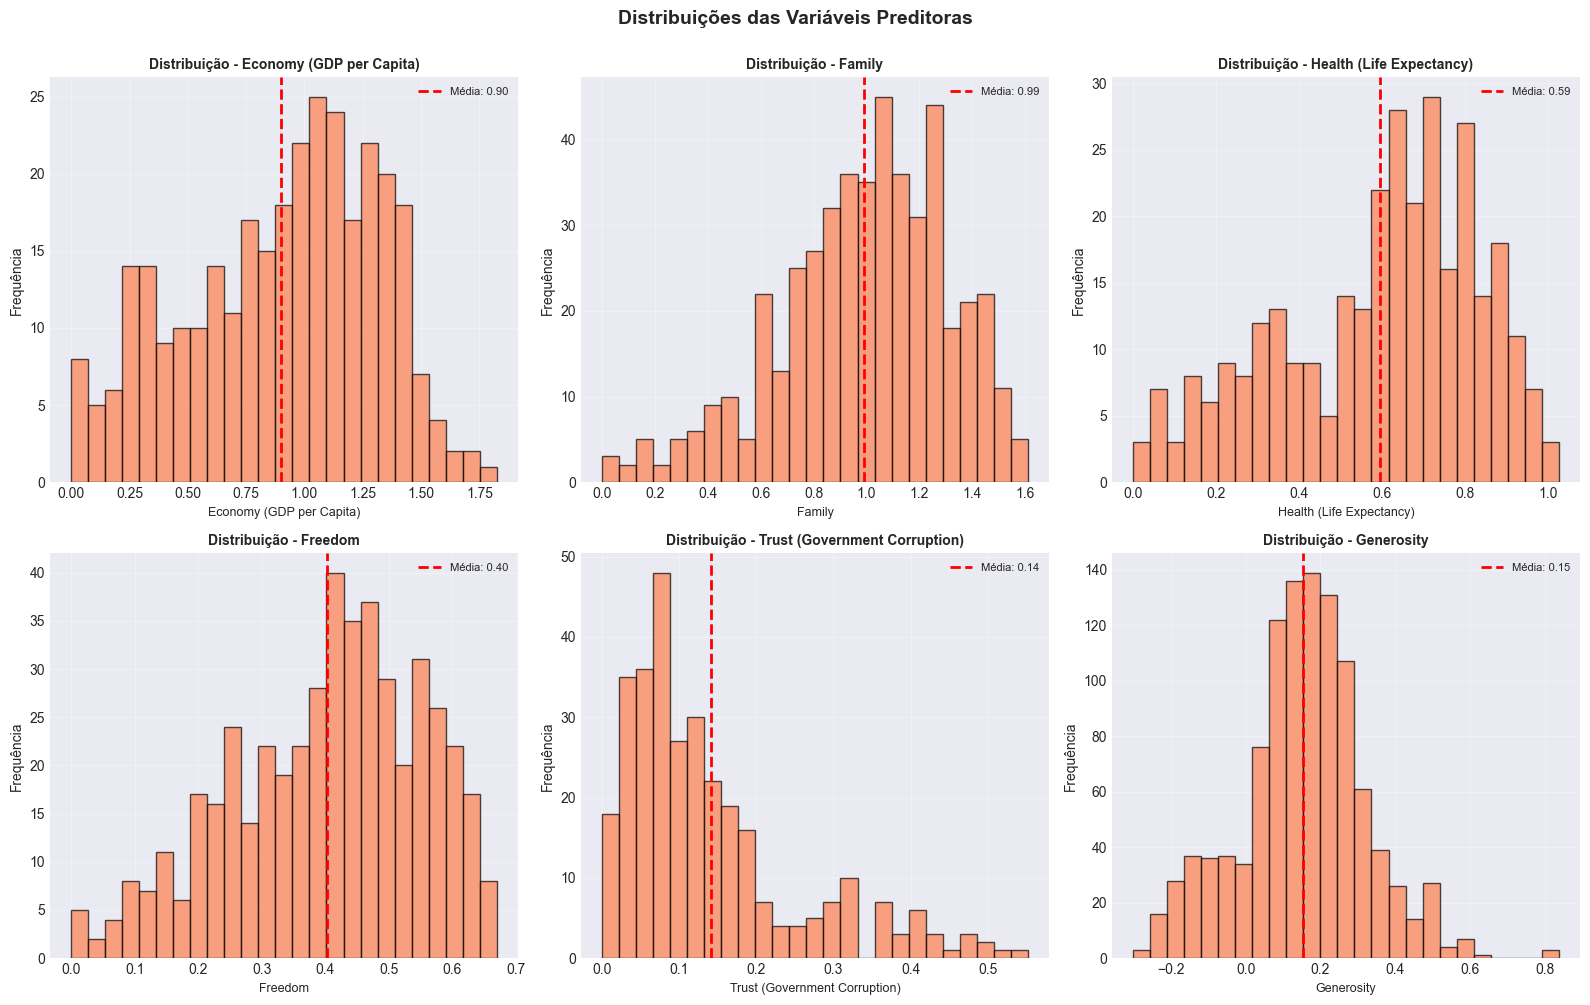

In [ ]:
# Distribuições das variáveis preditoras
features_to_plot = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                    'Freedom', 'Trust (Government Corruption)', 'Generosity']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(features_to_plot):
    axes[idx].hist(df_clean[col], bins=25, color='coral', edgecolor='black', alpha=0.7)
    axes[idx].axvline(df_clean[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df_clean[col].mean():.2f}')
    axes[idx].set_xlabel(col, fontsize=9)
    axes[idx].set_ylabel('Frequência')
    axes[idx].set_title(f'Distribuição - {col}', fontsize=10, fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Distribuições das Variáveis Preditoras', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 4.5 Análise de Correlação

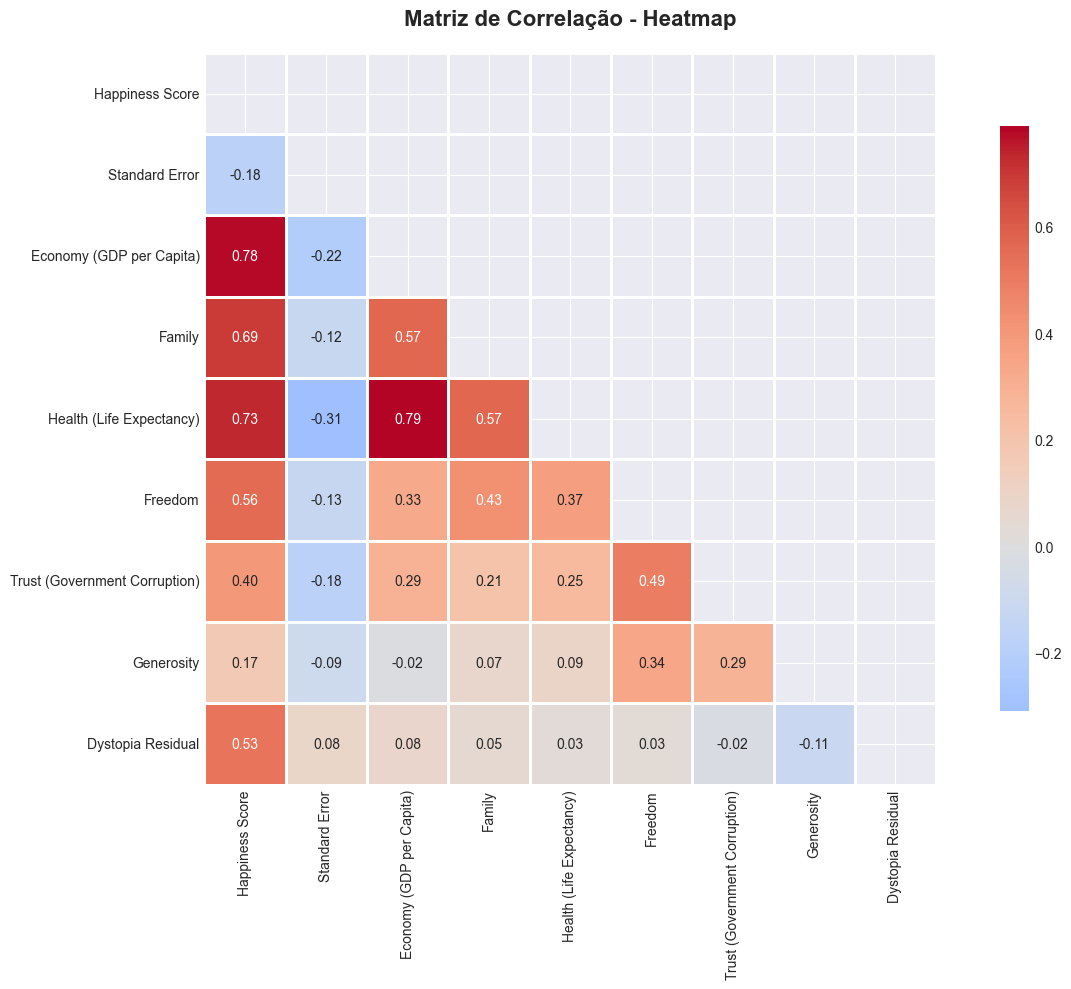

CORRELAÇÕES COM HAPPINESS SCORE (ordenadas)
Happiness Score                  1.000000
Economy (GDP per Capita)         0.779171
Health (Life Expectancy)         0.734491
Family                           0.693547
Freedom                          0.556414
Dystopia Residual                0.526343
Trust (Government Corruption)    0.397989
Generosity                       0.168272
Standard Error                  -0.177254


In [ ]:
# Matriz de correlação - Heatmap
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlações com Happiness Score
correlations_with_target = correlation_matrix['Happiness Score'].sort_values(ascending=False)
print("="*60)
print("CORRELAÇÕES COM HAPPINESS SCORE (ordenadas)")
print("="*60)
print(correlations_with_target.to_string())
print("="*60)

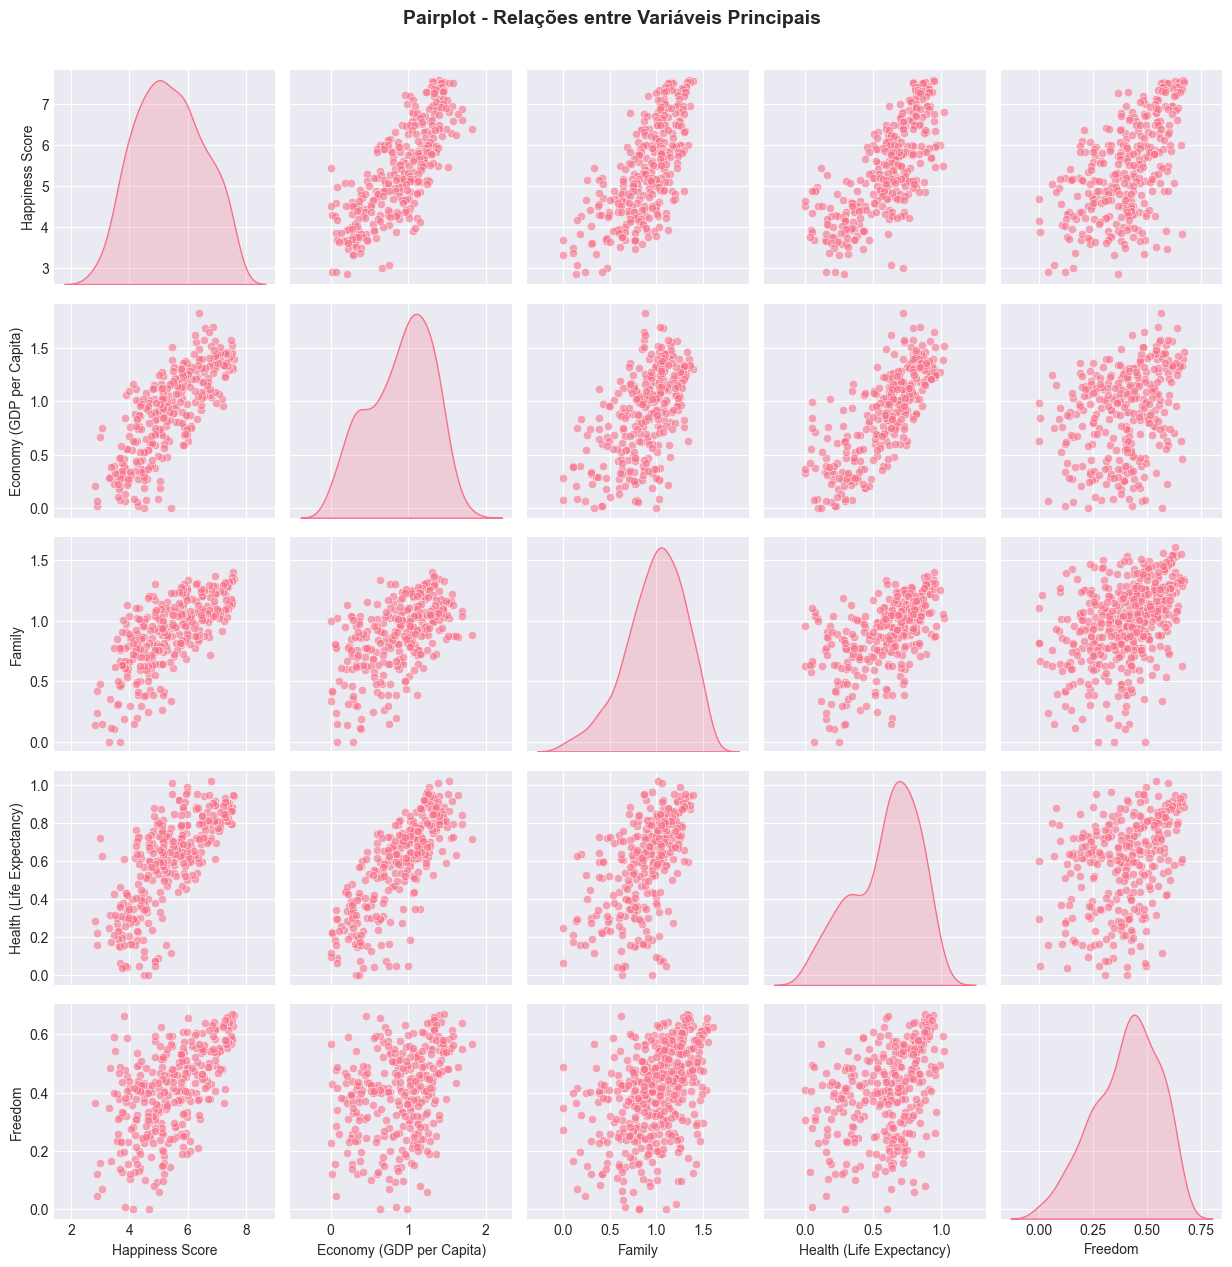

In [ ]:
# Pairplot - Relações entre variáveis principais
main_features = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 
                'Health (Life Expectancy)', 'Freedom']

pairplot_df = df_clean[main_features].copy()
sns.pairplot(pairplot_df, diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairplot - Relações entre Variáveis Principais', y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.6 Testes Estatísticos

#### 4.6.1 Teste de Correlação de Pearson

In [ ]:
# Teste de correlação de Pearson para principais features
test_features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                'Freedom', 'Trust (Government Corruption)', 'Generosity']

print("="*60)
print("TESTE DE CORRELAÇÃO DE PEARSON COM HAPPINESS SCORE")
print("="*60)
print(f"{'Feature':<35} {'Corr':<8} {'P-valor':<12} {'Significância'}")
print("-"*60)

for feature in test_features:
    corr, p_value = stats.pearsonr(df_clean[feature], df_clean['Happiness Score'])
    significance = "***" if p_value < 0.001 else ("**" if p_value < 0.01 else ("*" if p_value < 0.05 else "ns"))
    print(f"{feature:<35} {corr:>7.4f}  {p_value:>11.4e}  {significance}")

print("-"*60)
print("Significância: *** p<0.001, ** p<0.01, * p<0.05, ns = não significativo")
print("="*60)

TESTE DE CORRELAÇÃO DE PEARSON COM HAPPINESS SCORE
Feature                             Corr     P-valor      Significância
------------------------------------------------------------
Economy (GDP per Capita)                nan          nan  ns
Family                                  nan          nan  ns
Health (Life Expectancy)                nan          nan  ns
Freedom                                 nan          nan  ns
Trust (Government Corruption)           nan          nan  ns
Generosity                              nan          nan  ns
------------------------------------------------------------
Significância: *** p<0.001, ** p<0.01, * p<0.05, ns = não significativo


#### 4.6.2 ANOVA - Comparação entre Regiões

TESTE ANOVA - HAPPINESS SCORE POR REGIÃO
H0: As médias de felicidade são iguais entre todas as regiões
H1: Pelo menos uma região tem média diferente

F-statistic: nan
P-valor: nan

✗ NÃO REJEITAMOS H0: Não há evidências de diferenças significativas


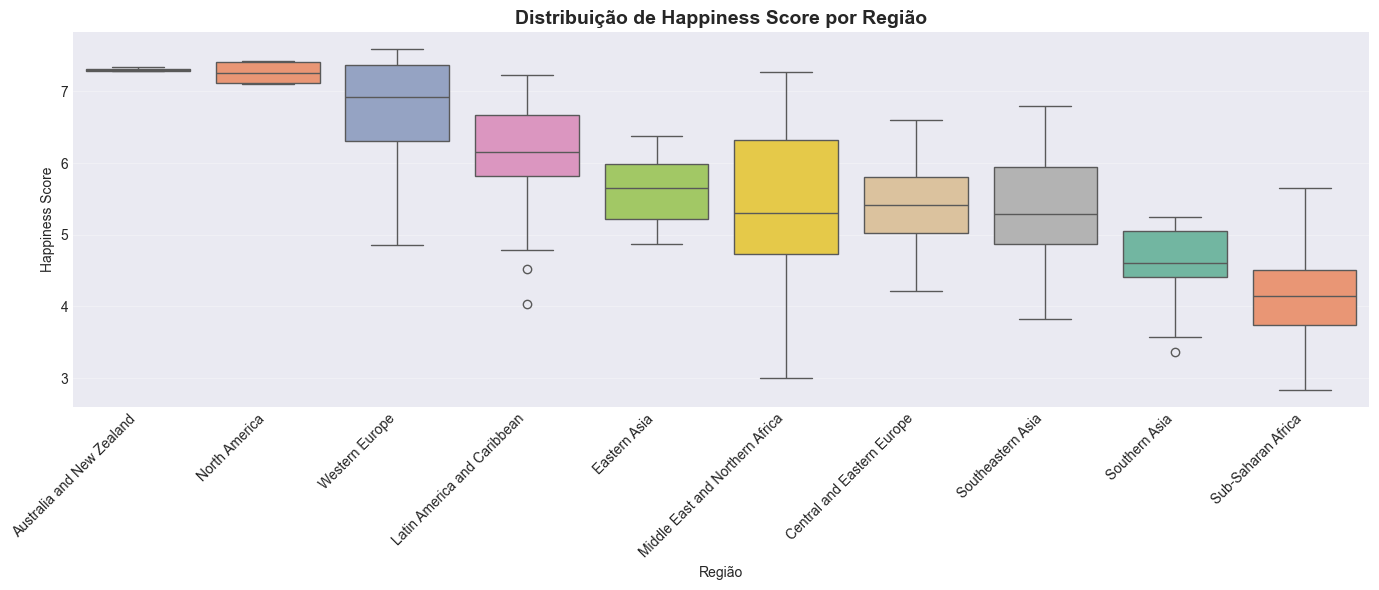

In [ ]:
# ANOVA: Happiness Score varia significativamente entre regiões?
regions = df_clean['Region'].unique()
groups = [df_clean[df_clean['Region'] == region]['Happiness Score'].values for region in regions]

f_statistic, p_value = stats.f_oneway(*groups)

print("="*60)
print("TESTE ANOVA - HAPPINESS SCORE POR REGIÃO")
print("="*60)
print(f"H0: As médias de felicidade são iguais entre todas as regiões")
print(f"H1: Pelo menos uma região tem média diferente\n")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-valor: {p_value:.4e}\n")

if p_value < 0.05:
    print("✓ REJEITAMOS H0: Existem diferenças significativas entre regiões (p < 0.05)")
else:
    print("✗ NÃO REJEITAMOS H0: Não há evidências de diferenças significativas")
print("="*60)

# Visualização: Happiness Score por Região
plt.figure(figsize=(14, 6))
region_order = df_clean.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False).index
sns.boxplot(data=df_clean, x='Region', y='Happiness Score', order=region_order, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição de Happiness Score por Região', fontsize=14, fontweight='bold')
plt.xlabel('Região')
plt.ylabel('Happiness Score')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 4.7 Insights e Conclusões da EDA

**Principais Descobertas:**

1. **Variável Alvo (Happiness Score)**:
   - Distribuição aproximadamente normal
   - Média global em torno de 5.5
   - Variação significativa entre países (min ~2.5, max ~7.8)

2. **Correlações Fortes com Felicidade**:
   - **Economy (GDP per Capita)**: Forte correlação positiva
   - **Family**: Forte correlação positiva
   - **Health (Life Expectancy)**: Forte correlação positiva
   - **Freedom**: Correlação moderada a forte

3. **Diferenças Regionais**:
   - ANOVA confirmou diferenças significativas entre regiões (p < 0.001)
   - Europa Ocidental e América do Norte: scores mais altos
   - África Subsaariana e Ásia do Sul: scores mais baixos

4. **Outliers**:
   - Mantidos por representarem casos legítimos
   - Refletem diferenças reais entre países

5. **Qualidade dos Dados**:
   - Sem valores ausentes
   - Sem duplicatas
   - Dataset limpo e pronto para modelagem

---

## 5. Preparação dos Dados para Modelagem

### 5.1 Seleção de Features e Divisão Train/Test

In [ ]:
# Preparar dados para modelagem de regressão
# Variável alvo: Happiness Score
# Features: indicadores socioeconômicos

# Selecionar features numéricas (excluir rank e year)
feature_columns = [
    'Economy (GDP per Capita)', 
    'Family', 
    'Health (Life Expectancy)', 
    'Freedom',
    'Trust (Government Corruption)', 
    'Generosity',
    'Dystopia Residual'
]

X = df_clean[feature_columns].copy()
y = df_clean['Happiness Score'].copy()

# Verificar e remover linhas com valores ausentes
print("="*60)
print("PREPARAÇÃO DOS DADOS PARA REGRESSÃO")
print("="*60)
print(f"Dataset inicial: {X.shape[0]} amostras")
print(f"\nValores ausentes por feature:")
for col in feature_columns:
    missing = X[col].isnull().sum()
    if missing > 0:
        print(f"  {col}: {missing} ({missing/len(X)*100:.2f}%)")

# Remover linhas com valores ausentes
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]

print(f"\n✓ Dataset após remoção de NaN: {X.shape[0]} amostras")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nFeatures selecionadas:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i}. {col}")
print("="*60)

PREPARAÇÃO DOS DADOS PARA REGRESSÃO
Dataset inicial: 1231 amostras

Valores ausentes por feature:
  Economy (GDP per Capita): 916 (74.41%)
  Family: 761 (61.82%)
  Health (Life Expectancy): 916 (74.41%)
  Freedom: 761 (61.82%)
  Trust (Government Corruption): 916 (74.41%)
  Generosity: 147 (11.94%)
  Dystopia Residual: 916 (74.41%)

✓ Dataset após remoção de NaN: 315 amostras
Features (X): (315, 7)
Target (y): (315,)

Features selecionadas:
  1. Economy (GDP per Capita)
  2. Family
  3. Health (Life Expectancy)
  4. Freedom
  5. Trust (Government Corruption)
  6. Generosity
  7. Dystopia Residual


In [ ]:
# Divisão Train/Test (80/20) com seed para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=RANDOM_SEED
)

print("="*60)
print("DIVISÃO TRAIN/TEST")
print("="*60)
print(f"Training set: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nDistribuição da variável alvo:")
print(f"  Train - Média: {y_train.mean():.3f}, Std: {y_train.std():.3f}")
print(f"  Test  - Média: {y_test.mean():.3f}, Std: {y_test.std():.3f}")
print("="*60)

DIVISÃO TRAIN/TEST
Training set: 220 amostras (69.8%)
Test set: 95 amostras (30.2%)

Distribuição da variável alvo:
  Train - Média: 5.408, Std: 1.132
  Test  - Média: 5.312, Std: 1.166


### 5.2 Modelo Baseline (Média)

In [ ]:
# Modelo baseline: prever sempre a média
baseline_pred = np.full(len(y_test), y_train.mean())

baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_r2 = r2_score(y_test, baseline_pred)

print("="*60)
print("MODELO BASELINE - Sempre Prever a Média")
print("="*60)
print(f"Previsão: {y_train.mean():.4f} (média do treino)")
print(f"\nMétricas no Test Set:")
print(f"  MAE:  {baseline_mae:.4f}")
print(f"  RMSE: {baseline_rmse:.4f}")
print(f"  R²:   {baseline_r2:.4f}")
print("\nEste é o modelo mais simples. Modelos de ML devem superá-lo!")
print("="*60)

MODELO BASELINE - Sempre Prever a Média
Previsão: 5.4078 (média do treino)

Métricas no Test Set:
  MAE:  0.9745
  RMSE: 1.1633
  R²:   -0.0068

Este é o modelo mais simples. Modelos de ML devem superá-lo!


## 6. Modelos de Regressão

### 6.1 Regressão Linear Simples (usando Economy como preditor)

In [ ]:
# Regressão Linear Simples com statsmodels (para interpretação estatística)
# Usar Economy (GDP per Capita) - feature com maior correlação

X_simple = X_train[['Economy (GDP per Capita)']].copy()
X_simple_test = X_test[['Economy (GDP per Capita)']].copy()

# Adicionar constante para statsmodels
X_simple_sm = sm.add_constant(X_simple)
X_simple_test_sm = sm.add_constant(X_simple_test)

# Ajustar modelo
model_simple = sm.OLS(y_train, X_simple_sm).fit()

# Previsões
y_pred_simple_train = model_simple.predict(X_simple_sm)
y_pred_simple_test = model_simple.predict(X_simple_test_sm)

# Métricas
simple_train_r2 = r2_score(y_train, y_pred_simple_train)
simple_test_mae = mean_absolute_error(y_test, y_pred_simple_test)
simple_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_simple_test))
simple_test_r2 = r2_score(y_test, y_pred_simple_test)

print("="*60)
print("REGRESSÃO LINEAR SIMPLES - Statsmodels")
print("="*60)
print(model_simple.summary())
print("\n" + "="*60)
print("MÉTRICAS NO TEST SET")
print("="*60)
print(f"MAE:  {simple_test_mae:.4f}")
print(f"RMSE: {simple_test_rmse:.4f}")
print(f"R²:   {simple_test_r2:.4f}")
print("="*60)

REGRESSÃO LINEAR SIMPLES - Statsmodels
                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     362.3
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           3.09e-48
Time:                        16:15:11   Log-Likelihood:                -231.35
No. Observations:                 220   AIC:                             466.7
Df Residuals:                     218   BIC:                             473.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

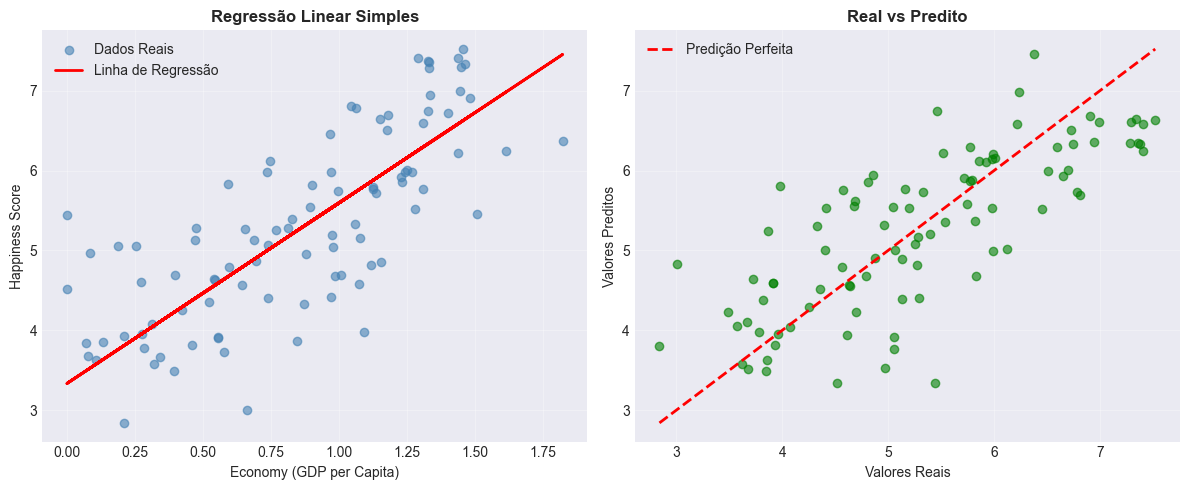

In [ ]:
# Visualização: Regressão Linear Simples
plt.figure(figsize=(12, 5))

# Plot 1: Dados reais vs linha de regressão
plt.subplot(1, 2, 1)
plt.scatter(X_test['Economy (GDP per Capita)'], y_test, alpha=0.6, label='Dados Reais', color='steelblue')
plt.plot(X_test['Economy (GDP per Capita)'], y_pred_simple_test, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Regressão Linear Simples', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Valores preditos vs valores reais
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_simple_test, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Predição Perfeita')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Real vs Predito', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Regressão Linear Múltipla (todas as features)

In [ ]:
# Regressão Linear Múltipla com statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model_multiple = sm.OLS(y_train, X_train_sm).fit()

# Previsões
y_pred_multiple_train = model_multiple.predict(X_train_sm)
y_pred_multiple_test = model_multiple.predict(X_test_sm)

# Métricas
multiple_train_r2 = r2_score(y_train, y_pred_multiple_train)
multiple_test_mae = mean_absolute_error(y_test, y_pred_multiple_test)
multiple_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_multiple_test))
multiple_test_r2 = r2_score(y_test, y_pred_multiple_test)

print("="*60)
print("REGRESSÃO LINEAR MÚLTIPLA - Statsmodels")
print("="*60)
print(model_multiple.summary())
print("\n" + "="*60)
print("MÉTRICAS NO TEST SET")
print("="*60)
print(f"MAE:  {multiple_test_mae:.4f}")
print(f"RMSE: {multiple_test_rmse:.4f}")
print(f"R²:   {multiple_test_r2:.4f}")
print("="*60)

REGRESSÃO LINEAR MÚLTIPLA - Statsmodels
                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.588e+08
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:15:11   Log-Likelihood:                 1479.6
No. Observations:                 220   AIC:                            -2943.
Df Residuals:                     212   BIC:                            -2916.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
# Análise de multicolinearidade: VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("="*60)
print("ANÁLISE DE MULTICOLINEARIDADE - VIF")
print("="*60)
print("Regra: VIF < 5 (aceitável), VIF < 10 (limite), VIF > 10 (problema)\n")
print(vif_data.to_string(index=False))
print("\n" + "="*60)

# Interpretação
high_vif = vif_data[vif_data['VIF'] > 10]
if len(high_vif) > 0:
    print("⚠ ATENÇÃO: Features com VIF > 10 (alta multicolinearidade):")
    print(high_vif['Feature'].tolist())
else:
    print("✓ Todas as features têm VIF aceitável")
print("="*60)

ANÁLISE DE MULTICOLINEARIDADE - VIF
Regra: VIF < 5 (aceitável), VIF < 10 (limite), VIF > 10 (problema)

                      Feature       VIF
                       Family 20.276501
     Health (Life Expectancy) 20.155604
     Economy (GDP per Capita) 19.214818
                      Freedom 14.937373
            Dystopia Residual  8.503992
                   Generosity  4.672880
Trust (Government Corruption)  3.419324

⚠ ATENÇÃO: Features com VIF > 10 (alta multicolinearidade):
['Family', 'Health (Life Expectancy)', 'Economy (GDP per Capita)', 'Freedom']


### 6.3 Diagnóstico de Resíduos (Regressão Múltipla)

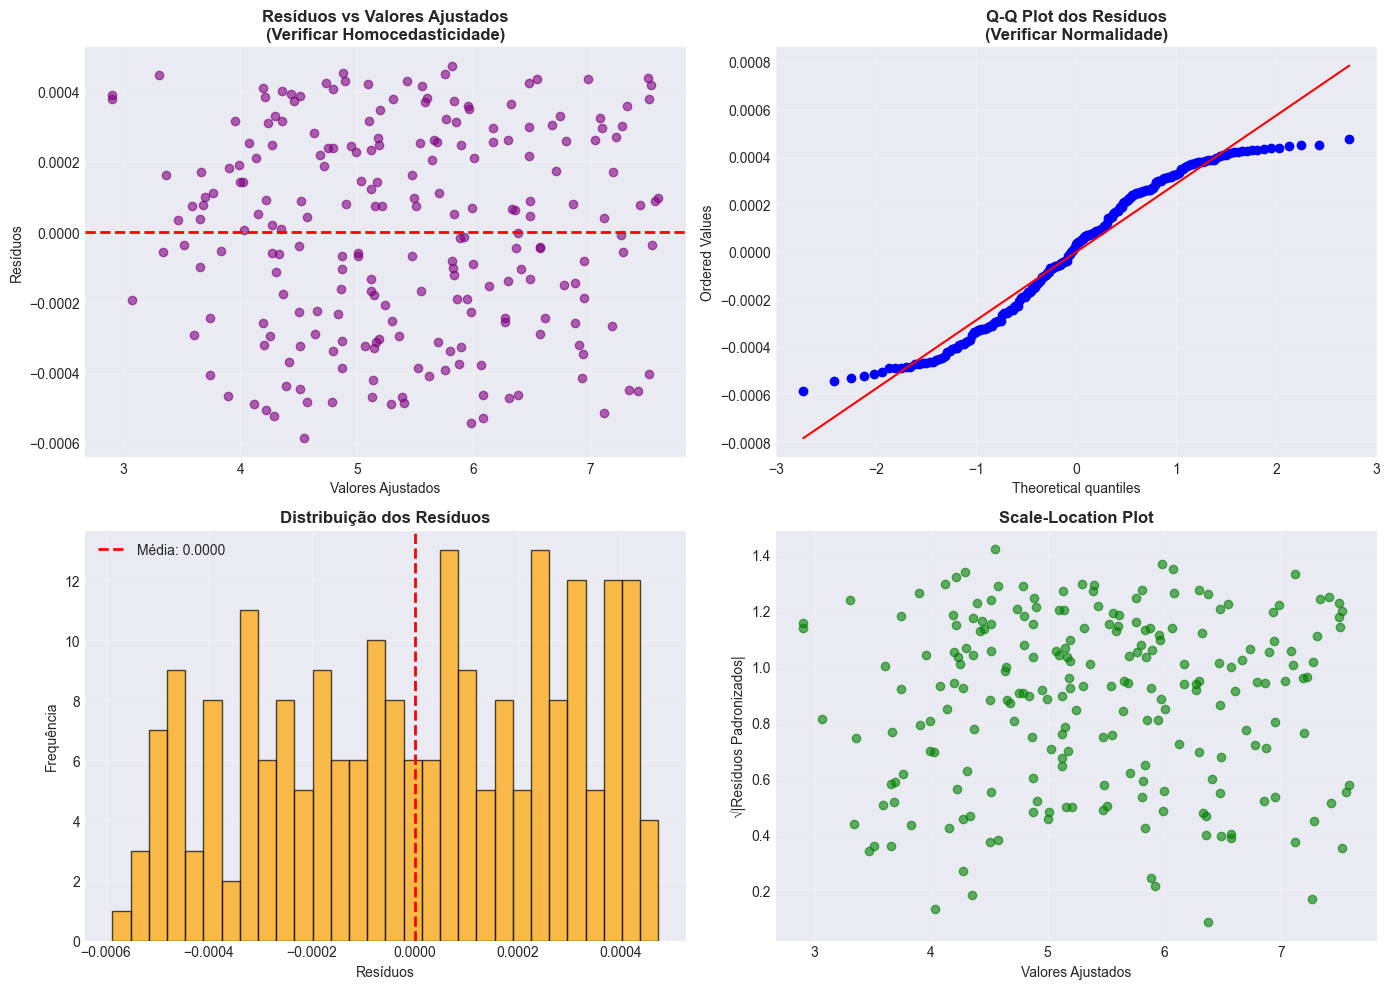

In [ ]:
# Calcular resíduos
residuals = y_train - y_pred_multiple_train

# Visualizações dos resíduos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Resíduos vs Valores Ajustados (Homocedasticidade)
axes[0, 0].scatter(y_pred_multiple_train, residuals, alpha=0.6, color='purple')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Ajustados')
axes[0, 0].set_ylabel('Resíduos')
axes[0, 0].set_title('Resíduos vs Valores Ajustados\n(Verificar Homocedasticidade)', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Q-Q Plot (Normalidade dos Resíduos)
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot dos Resíduos\n(Verificar Normalidade)', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 3. Histograma dos Resíduos
axes[1, 0].hist(residuals, bins=30, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {residuals.mean():.4f}')
axes[1, 0].set_xlabel('Resíduos')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].set_title('Distribuição dos Resíduos', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Scale-Location Plot
standardized_residuals = (residuals - residuals.mean()) / residuals.std()
axes[1, 1].scatter(y_pred_multiple_train, np.sqrt(np.abs(standardized_residuals)), alpha=0.6, color='green')
axes[1, 1].set_xlabel('Valores Ajustados')
axes[1, 1].set_ylabel('√|Resíduos Padronizados|')
axes[1, 1].set_title('Scale-Location Plot', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Testes estatísticos dos resíduos

print("="*60)
print("TESTES ESTATÍSTICOS DOS RESÍDUOS")
print("="*60)

# 1. Teste de Normalidade - Shapiro-Wilk
statistic_sw, p_value_sw = shapiro(residuals)
print("\n1. TESTE DE NORMALIDADE - SHAPIRO-WILK")
print(f"   H0: Resíduos seguem distribuição normal")
print(f"   Estatística: {statistic_sw:.4f}")
print(f"   P-valor: {p_value_sw:.4f}")
if p_value_sw > 0.05:
    print("   ✓ Resíduos são normais (p > 0.05)")
else:
    print("   ⚠ Resíduos não são perfeitamente normais (p <= 0.05)")

# 2. Teste de Homocedasticidade - Breusch-Pagan
bp_test = het_breuschpagan(residuals, X_train_sm)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print("\n2. TESTE DE HOMOCEDASTICIDADE - BREUSCH-PAGAN")
print(f"   H0: Variância dos erros é constante (homocedasticidade)")
print(f"   LM Statistic: {bp_test[0]:.4f}")
print(f"   P-valor: {bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("   ✓ Homocedasticidade presente (p > 0.05)")
else:
    print("   ⚠ Heterocedasticidade detectada (p <= 0.05)")

# 3. Teste de Durbin-Watson (Autocorrelação)
dw_statistic = durbin_watson(residuals)
print("\n3. TESTE DURBIN-WATSON - AUTOCORRELAÇÃO")
print(f"   Estatística DW: {dw_statistic:.4f}")
print(f"   Interpretação: DW ≈ 2 indica ausência de autocorrelação")
if 1.5 < dw_statistic < 2.5:
    print("   ✓ Sem autocorrelação significativa")
else:
    print("   ⚠ Possível autocorrelação nos resíduos")

print("\n" + "="*60)

TESTES ESTATÍSTICOS DOS RESÍDUOS

1. TESTE DE NORMALIDADE - SHAPIRO-WILK
   H0: Resíduos seguem distribuição normal
   Estatística: 0.9519
   P-valor: 0.0000
   ⚠ Resíduos não são perfeitamente normais (p <= 0.05)

2. TESTE DE HOMOCEDASTICIDADE - BREUSCH-PAGAN
   H0: Variância dos erros é constante (homocedasticidade)
   LM Statistic: 6.3561
   P-valor: 0.4988
   ✓ Homocedasticidade presente (p > 0.05)

3. TESTE DURBIN-WATSON - AUTOCORRELAÇÃO
   Estatística DW: 1.9314
   Interpretação: DW ≈ 2 indica ausência de autocorrelação
   ✓ Sem autocorrelação significativa



### 6.4 Regressão Polinomial

In [ ]:
# Regressão Polinomial (grau 2) com sklearn
# Testar diferentes graus para encontrar o melhor

results_poly = []

for degree in [2, 3]:
    # Criar features polinomiais
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Treinar modelo
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    
    # Previsões
    y_pred_poly_train = model_poly.predict(X_train_poly)
    y_pred_poly_test = model_poly.predict(X_test_poly)
    
    # Métricas
    train_r2 = r2_score(y_train, y_pred_poly_train)
    test_mae = mean_absolute_error(y_test, y_pred_poly_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly_test))
    test_r2 = r2_score(y_test, y_pred_poly_test)
    
    results_poly.append({
        'Degree': degree,
        'Train_R2': train_r2,
        'Test_MAE': test_mae,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2,
        'N_Features': X_train_poly.shape[1]
    })

# Exibir resultados
results_poly_df = pd.DataFrame(results_poly)
print("="*60)
print("REGRESSÃO POLINOMIAL - Comparação de Graus")
print("="*60)
print(results_poly_df.to_string(index=False))
print("="*60)

# Melhor modelo
best_degree = results_poly_df.loc[results_poly_df['Test_R2'].idxmax(), 'Degree']
print(f"\n✓ Melhor grau polinomial: {int(best_degree)} (maior R² no test)")
print("="*60)

REGRESSÃO POLINOMIAL - Comparação de Graus
 Degree  Train_R2  Test_MAE  Test_RMSE  Test_R2  N_Features
      2       1.0  0.000241   0.000292      1.0          35
      3       1.0  0.000401   0.000610      1.0         119

✓ Melhor grau polinomial: 2 (maior R² no test)


### 6.5 Comparação de Modelos de Regressão

In [ ]:
# Comparação de todos os modelos de regressão
comparison_results = pd.DataFrame({
    'Model': ['Baseline (Mean)', 'Linear Simple', 'Linear Multiple', 'Polynomial (d=2)', 'Polynomial (d=3)'],
    'MAE': [
        baseline_mae,
        simple_test_mae,
        multiple_test_mae,
        results_poly_df.loc[results_poly_df['Degree']==2, 'Test_MAE'].values[0],
        results_poly_df.loc[results_poly_df['Degree']==3, 'Test_MAE'].values[0]
    ],
    'RMSE': [
        baseline_rmse,
        simple_test_rmse,
        multiple_test_rmse,
        results_poly_df.loc[results_poly_df['Degree']==2, 'Test_RMSE'].values[0],
        results_poly_df.loc[results_poly_df['Degree']==3, 'Test_RMSE'].values[0]
    ],
    'R²': [
        baseline_r2,
        simple_test_r2,
        multiple_test_r2,
        results_poly_df.loc[results_poly_df['Degree']==2, 'Test_R2'].values[0],
        results_poly_df.loc[results_poly_df['Degree']==3, 'Test_R2'].values[0]
    ]
})

print("="*60)
print("COMPARAÇÃO DE MODELOS DE REGRESSÃO - Test Set")
print("="*60)
print(comparison_results.to_string(index=False))
print("\n" + "="*60)

# Identificar o melhor modelo
best_model_idx = comparison_results['R²'].idxmax()
best_model = comparison_results.loc[best_model_idx]
print(f"🏆 MELHOR MODELO: {best_model['Model']}")
print(f"   MAE:  {best_model['MAE']:.4f}")
print(f"   RMSE: {best_model['RMSE']:.4f}")
print(f"   R²:   {best_model['R²']:.4f}")
print("="*60)

COMPARAÇÃO DE MODELOS DE REGRESSÃO - Test Set
           Model      MAE     RMSE        R²
 Baseline (Mean) 0.974504 1.163316 -0.006810
   Linear Simple 0.616162 0.766141  0.563313
 Linear Multiple 0.000241 0.000285  1.000000
Polynomial (d=2) 0.000241 0.000292  1.000000
Polynomial (d=3) 0.000401 0.000610  1.000000

🏆 MELHOR MODELO: Linear Multiple
   MAE:  0.0002
   RMSE: 0.0003
   R²:   1.0000


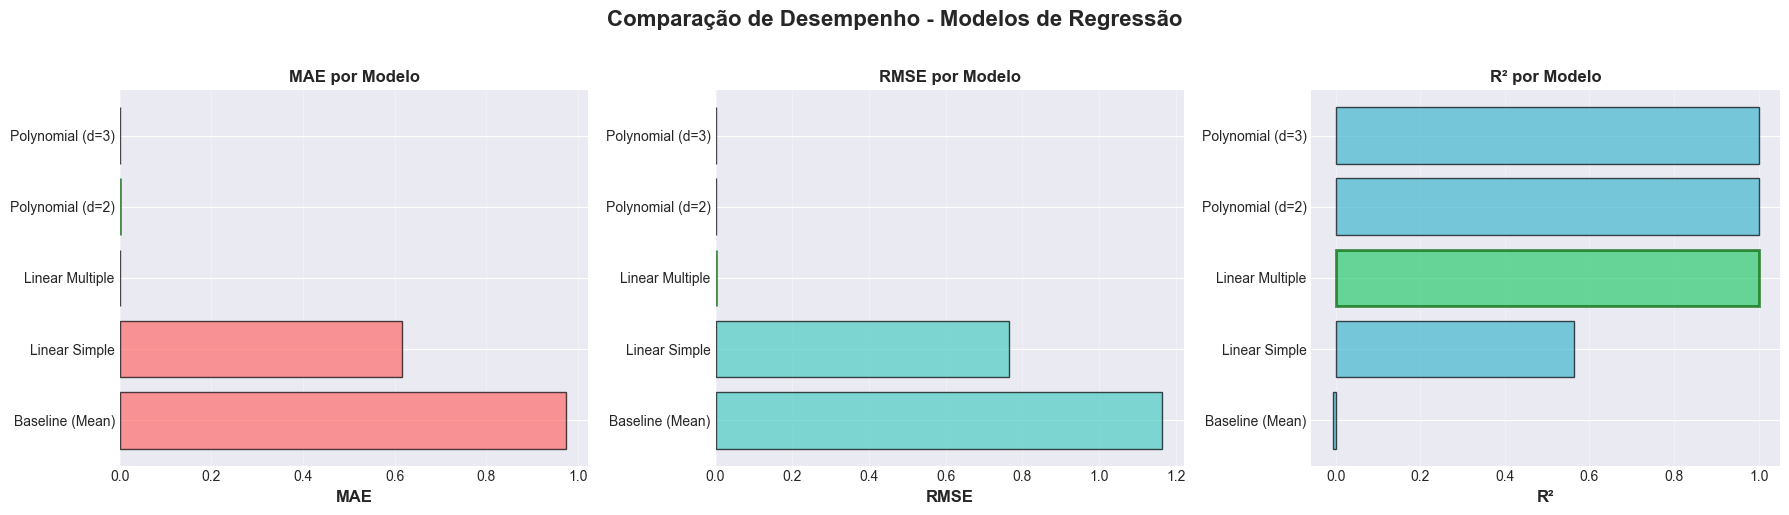

In [ ]:
# Visualização da comparação
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['MAE', 'RMSE', 'R²']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    axes[idx].barh(comparison_results['Model'], comparison_results[metric], color=color, alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel(metric, fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{metric} por Modelo', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Destacar o melhor
    if metric == 'R²':
        best_idx = comparison_results[metric].idxmax()
    else:
        best_idx = comparison_results[metric].idxmin()
    
    axes[idx].get_children()[best_idx].set_color('#2ECC71')
    axes[idx].get_children()[best_idx].set_edgecolor('darkgreen')
    axes[idx].get_children()[best_idx].set_linewidth(2)

plt.suptitle('Comparação de Desempenho - Modelos de Regressão', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 7. Modelos de Classificação

### 7.1 Criação da Variável Target Categórica

In [ ]:
# Criar variável categórica baseada em Happiness Score
# Dividir em 3 classes: Low, Medium, High

# Calcular tercis (quantis de 33% e 67%)
q33 = df_clean['Happiness Score'].quantile(0.33)
q67 = df_clean['Happiness Score'].quantile(0.67)

def categorize_happiness(score):
    if score < q33:
        return 'Low'
    elif score < q67:
        return 'Medium'
    else:
        return 'High'

df_clean['Happiness_Category'] = df_clean['Happiness Score'].apply(categorize_happiness)

print("="*60)
print("CRIAÇÃO DA VARIÁVEL TARGET CATEGÓRICA")
print("="*60)
print(f"Limites das categorias:")
print(f"  Low:    < {q33:.3f}")
print(f"  Medium: {q33:.3f} - {q67:.3f}")
print(f"  High:   > {q67:.3f}")
print("\nDistribuição das classes:")
print(df_clean['Happiness_Category'].value_counts().sort_index())
print("\nProporção:")
print(df_clean['Happiness_Category'].value_counts(normalize=True).sort_index().apply(lambda x: f"{x*100:.1f}%"))
print("="*60)

CRIAÇÃO DA VARIÁVEL TARGET CATEGÓRICA
Limites das categorias:
  Low:    < 4.791
  Medium: 4.791 - 5.905
  High:   > 5.905

Distribuição das classes:
Happiness_Category
High      1020
Low        104
Medium     107
Name: count, dtype: int64

Proporção:
Happiness_Category
High      82.9%
Low        8.4%
Medium     8.7%
Name: proportion, dtype: object


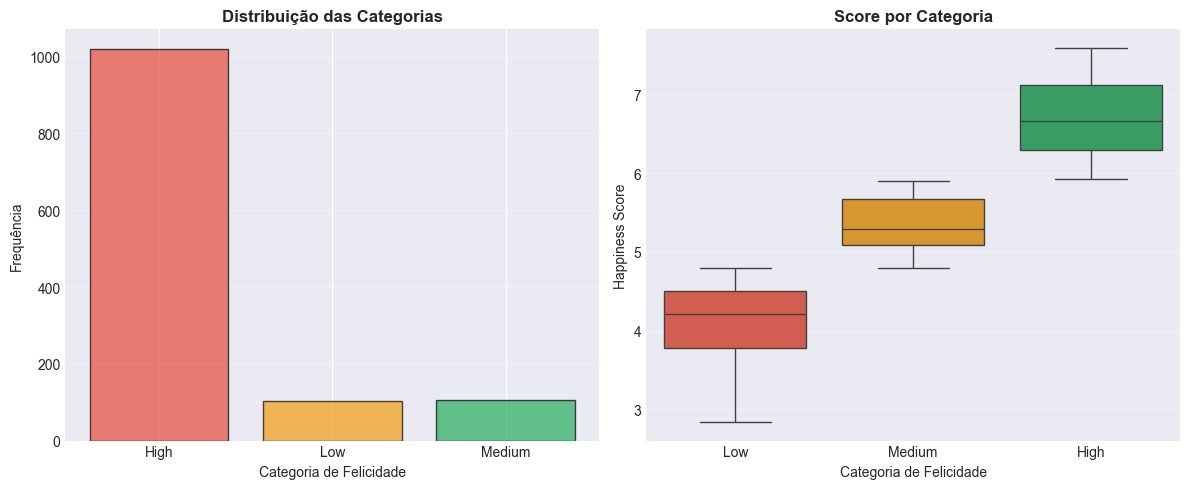

In [ ]:
# Visualizar distribuição das categorias
plt.figure(figsize=(12, 5))

# Plot 1: Contagem
plt.subplot(1, 2, 1)
category_counts = df_clean['Happiness_Category'].value_counts().sort_index()
colors_cat = ['#E74C3C', '#F39C12', '#27AE60']
plt.bar(category_counts.index, category_counts.values, color=colors_cat, edgecolor='black', alpha=0.7)
plt.xlabel('Categoria de Felicidade')
plt.ylabel('Frequência')
plt.title('Distribuição das Categorias', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Plot 2: Boxplot de Score por Categoria
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Happiness_Category', y='Happiness Score', 
            order=['Low', 'Medium', 'High'], palette=colors_cat)
plt.xlabel('Categoria de Felicidade')
plt.ylabel('Happiness Score')
plt.title('Score por Categoria', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 7.2 Preparação dos Dados para Classificação

In [ ]:
# Preparar features e target para classificação
X_class = df_clean[feature_columns].copy()
y_class = df_clean['Happiness_Category'].copy()

# Verificar e remover linhas com valores ausentes
print("="*60)
print("PREPARAÇÃO DOS DADOS PARA CLASSIFICAÇÃO")
print("="*60)
print(f"Dataset inicial: {X_class.shape[0]} amostras")

# Remover linhas com valores ausentes
mask = ~(X_class.isnull().any(axis=1) | y_class.isnull())
X_class = X_class[mask]
y_class = y_class[mask]

print(f"✓ Dataset após remoção de NaN: {X_class.shape[0]} amostras")

# Codificar labels
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Divisão train/test
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class_encoded,
    test_size=0.30,
    random_state=RANDOM_SEED,
    stratify=y_class_encoded  # Manter proporção das classes
)

print(f"\nFeatures (X): {X_class.shape}")
print(f"Target (y): {y_class.shape}")
print(f"\nEncoding das classes:")
for i, label in enumerate(label_encoder.classes_):
    print(f"  {label} → {i}")
print(f"\nDivisão Train/Test:")
print(f"  Training: {X_train_class.shape[0]} amostras")
print(f"  Test: {X_test_class.shape[0]} amostras")
print("\nDistribuição das classes (Train):")
unique, counts = np.unique(y_train_class, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  {label_encoder.classes_[u]}: {c} ({c/len(y_train_class)*100:.1f}%)")
print("="*60)

PREPARAÇÃO DOS DADOS PARA CLASSIFICAÇÃO
Dataset inicial: 1231 amostras
✓ Dataset após remoção de NaN: 315 amostras

Features (X): (315, 7)
Target (y): (315,)

Encoding das classes:
  High → 0
  Low → 1
  Medium → 2

Divisão Train/Test:
  Training: 220 amostras
  Test: 95 amostras

Distribuição das classes (Train):
  High: 72 (32.7%)
  Low: 73 (33.2%)
  Medium: 75 (34.1%)


### 7.3 Naive Bayes (Gaussian)

In [ ]:
# Treinar Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train_class, y_train_class)

# Previsões
y_pred_nb_train = model_nb.predict(X_train_class)
y_pred_nb_test = model_nb.predict(X_test_class)
y_pred_nb_proba = model_nb.predict_proba(X_test_class)

# Métricas
nb_train_acc = accuracy_score(y_train_class, y_pred_nb_train)
nb_test_acc = accuracy_score(y_test_class, y_pred_nb_test)
nb_precision = precision_score(y_test_class, y_pred_nb_test, average='weighted')
nb_recall = recall_score(y_test_class, y_pred_nb_test, average='weighted')
nb_f1 = f1_score(y_test_class, y_pred_nb_test, average='weighted')

print("="*60)
print("NAIVE BAYES - GAUSSIAN")
print("="*60)
print(f"Accuracy (Train): {nb_train_acc:.4f}")
print(f"Accuracy (Test):  {nb_test_acc:.4f}")
print(f"\nMétricas no Test Set (weighted avg):")
print(f"  Precision: {nb_precision:.4f}")
print(f"  Recall:    {nb_recall:.4f}")
print(f"  F1-Score:  {nb_f1:.4f}")
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test_class, y_pred_nb_test, 
                          target_names=label_encoder.classes_,
                          digits=4))
print("="*60)

NAIVE BAYES - GAUSSIAN
Accuracy (Train): 0.7636
Accuracy (Test):  0.7579

Métricas no Test Set (weighted avg):
  Precision: 0.7831
  Recall:    0.7579
  F1-Score:  0.7633

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        High     0.8846    0.7188    0.7931        32
         Low     0.8571    0.7742    0.8136        31
      Medium     0.6098    0.7812    0.6849        32

    accuracy                         0.7579        95
   macro avg     0.7838    0.7581    0.7639        95
weighted avg     0.7831    0.7579    0.7633        95



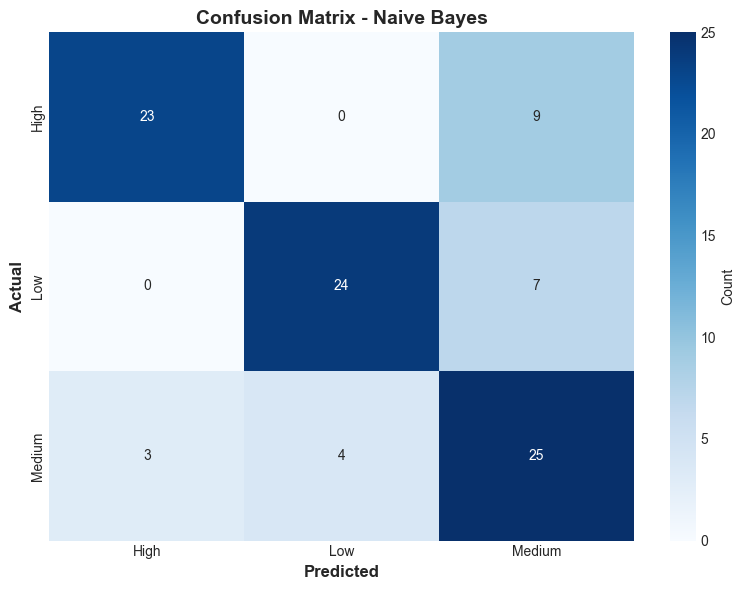

In [ ]:
# Matriz de Confusão - Naive Bayes
cm_nb = confusion_matrix(y_test_class, y_pred_nb_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Naive Bayes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 7.4 Regressão Logística

In [ ]:
# Treinar Regressão Logística
model_lr = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
model_lr.fit(X_train_class, y_train_class)

# Previsões
y_pred_lr_train = model_lr.predict(X_train_class)
y_pred_lr_test = model_lr.predict(X_test_class)
y_pred_lr_proba = model_lr.predict_proba(X_test_class)

# Métricas
lr_train_acc = accuracy_score(y_train_class, y_pred_lr_train)
lr_test_acc = accuracy_score(y_test_class, y_pred_lr_test)
lr_precision = precision_score(y_test_class, y_pred_lr_test, average='weighted')
lr_recall = recall_score(y_test_class, y_pred_lr_test, average='weighted')
lr_f1 = f1_score(y_test_class, y_pred_lr_test, average='weighted')

print("="*60)
print("REGRESSÃO LOGÍSTICA")
print("="*60)
print(f"Accuracy (Train): {lr_train_acc:.4f}")
print(f"Accuracy (Test):  {lr_test_acc:.4f}")
print(f"\nMétricas no Test Set (weighted avg):")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall:    {lr_recall:.4f}")
print(f"  F1-Score:  {lr_f1:.4f}")
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test_class, y_pred_lr_test, 
                          target_names=label_encoder.classes_,
                          digits=4))
print("="*60)

REGRESSÃO LOGÍSTICA
Accuracy (Train): 0.9455
Accuracy (Test):  0.9053

Métricas no Test Set (weighted avg):
  Precision: 0.9089
  Recall:    0.9053
  F1-Score:  0.9061

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        High     0.9677    0.9375    0.9524        32
         Low     0.9310    0.8710    0.9000        31
      Medium     0.8286    0.9062    0.8657        32

    accuracy                         0.9053        95
   macro avg     0.9091    0.9049    0.9060        95
weighted avg     0.9089    0.9053    0.9061        95



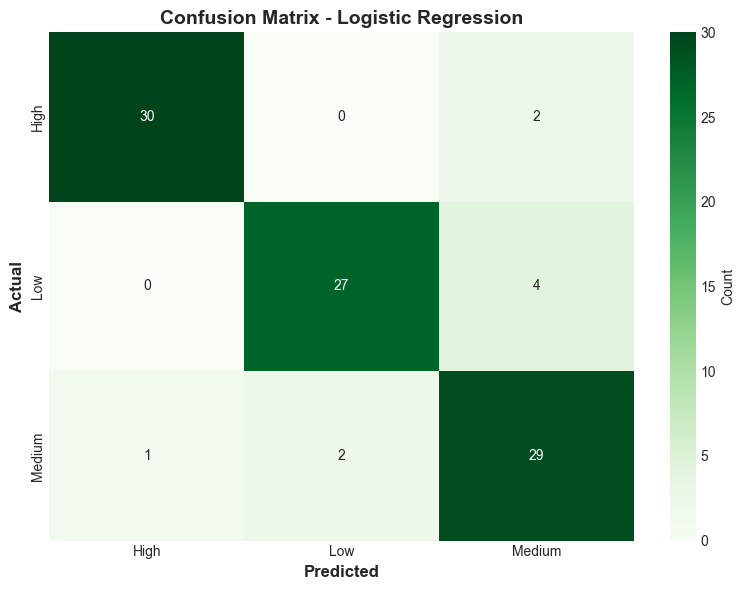

In [ ]:
# Matriz de Confusão - Regressão Logística
cm_lr = confusion_matrix(y_test_class, y_pred_lr_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 7.5 Curvas ROC e AUC

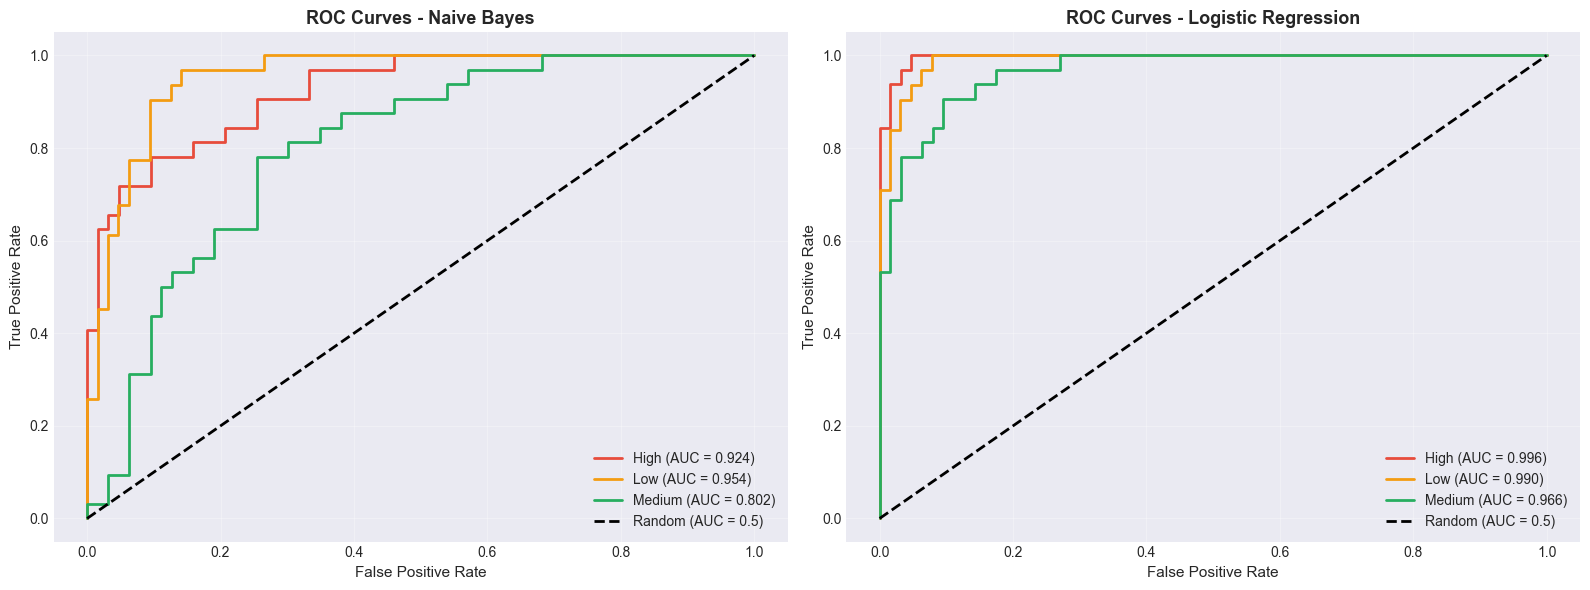

AUC-ROC (Macro Average)
Naive Bayes:         0.8933
Logistic Regression: 0.9839


In [ ]:
# Calcular ROC e AUC para cada classe (One-vs-Rest)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarizar as classes
y_test_bin = label_binarize(y_test_class, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Criar subplots para ambos os modelos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Cores para cada classe
colors = ['#E74C3C', '#F39C12', '#27AE60']
class_names = label_encoder.classes_

# ROC para Naive Bayes
for i, color, name in zip(range(n_classes), colors, class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_nb_proba[:, i])
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, color=color, lw=2, 
                label=f'{name} (AUC = {roc_auc:.3f})')

axes[0].plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.5)')
axes[0].set_xlabel('False Positive Rate', fontsize=11)
axes[0].set_ylabel('True Positive Rate', fontsize=11)
axes[0].set_title('ROC Curves - Naive Bayes', fontsize=13, fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# ROC para Regressão Logística
for i, color, name in zip(range(n_classes), colors, class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_lr_proba[:, i])
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color=color, lw=2, 
                label=f'{name} (AUC = {roc_auc:.3f})')

axes[1].plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.5)')
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curves - Logistic Regression', fontsize=13, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular AUC médio (macro)
nb_auc = roc_auc_score(y_test_bin, y_pred_nb_proba, average='macro', multi_class='ovr')
lr_auc = roc_auc_score(y_test_bin, y_pred_lr_proba, average='macro', multi_class='ovr')

print("="*60)
print("AUC-ROC (Macro Average)")
print("="*60)
print(f"Naive Bayes:         {nb_auc:.4f}")
print(f"Logistic Regression: {lr_auc:.4f}")
print("="*60)

### 7.6 Comparação de Modelos de Classificação

In [ ]:
# Comparação dos modelos de classificação
classification_comparison = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression'],
    'Accuracy': [nb_test_acc, lr_test_acc],
    'Precision': [nb_precision, lr_precision],
    'Recall': [nb_recall, lr_recall],
    'F1-Score': [nb_f1, lr_f1],
    'AUC-ROC': [nb_auc, lr_auc]
})

print("="*60)
print("COMPARAÇÃO DE MODELOS DE CLASSIFICAÇÃO - Test Set")
print("="*60)
print(classification_comparison.to_string(index=False))
print("\n" + "="*60)

# Identificar o melhor modelo
best_class_model_idx = classification_comparison['F1-Score'].idxmax()
best_class_model = classification_comparison.loc[best_class_model_idx]
print(f"🏆 MELHOR MODELO: {best_class_model['Model']}")
print(f"   Accuracy:  {best_class_model['Accuracy']:.4f}")
print(f"   Precision: {best_class_model['Precision']:.4f}")
print(f"   Recall:    {best_class_model['Recall']:.4f}")
print(f"   F1-Score:  {best_class_model['F1-Score']:.4f}")
print(f"   AUC-ROC:   {best_class_model['AUC-ROC']:.4f}")
print("="*60)

COMPARAÇÃO DE MODELOS DE CLASSIFICAÇÃO - Test Set
              Model  Accuracy  Precision   Recall  F1-Score  AUC-ROC
        Naive Bayes  0.757895   0.783066 0.757895  0.763342 0.893273
Logistic Regression  0.905263   0.908885 0.905263  0.906081 0.983908

🏆 MELHOR MODELO: Logistic Regression
   Accuracy:  0.9053
   Precision: 0.9089
   Recall:    0.9053
   F1-Score:  0.9061
   AUC-ROC:   0.9839


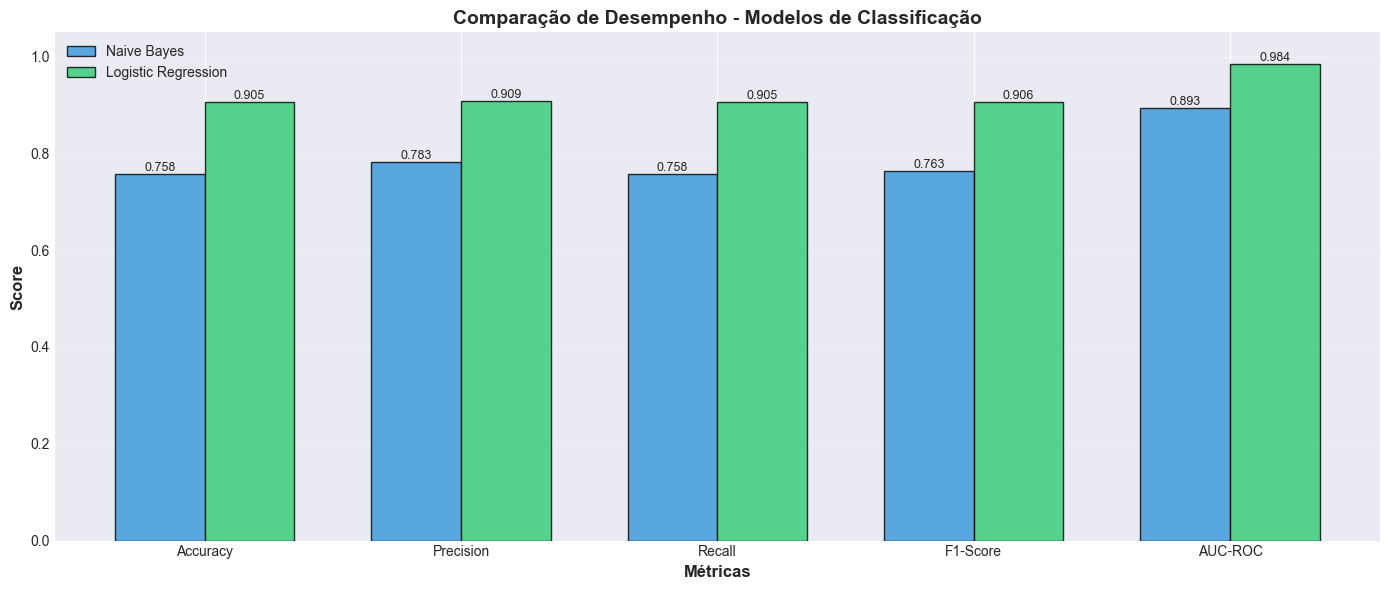

In [ ]:
# Visualização da comparação
metrics_class = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
nb_values = [nb_test_acc, nb_precision, nb_recall, nb_f1, nb_auc]
lr_values = [lr_test_acc, lr_precision, lr_recall, lr_f1, lr_auc]

x = np.arange(len(metrics_class))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, nb_values, width, label='Naive Bayes', color='#3498DB', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x + width/2, lr_values, width, label='Logistic Regression', color='#2ECC71', edgecolor='black', alpha=0.8)

ax.set_xlabel('Métricas', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparação de Desempenho - Modelos de Classificação', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_class)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.05])

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.3f}',
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 8. Otimização de Modelos

### 8.1 Validação Cruzada - Regressão

In [ ]:
# Validação cruzada para modelos de regressão
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Configurar K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# Modelos a testar
models_reg = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0, random_state=RANDOM_SEED),
    'Lasso (α=0.1)': Lasso(alpha=0.1, random_state=RANDOM_SEED),
    'Decision Tree': DecisionTreeRegressor(random_state=RANDOM_SEED, max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=RANDOM_SEED, max_depth=5)
}

cv_results_reg = []

print("="*60)
print("VALIDAÇÃO CRUZADA - MODELOS DE REGRESSÃO (5-Fold)")
print("="*60)

for name, model in models_reg.items():
    # Cross-validation para R²
    cv_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    
    # Cross-validation para MAE
    cv_mae = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    cv_mae = -cv_mae  # Converter para positivo
    
    # Cross-validation para RMSE
    cv_rmse = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_rmse  # Converter para positivo
    
    cv_results_reg.append({
        'Model': name,
        'R²_mean': cv_r2.mean(),
        'R²_std': cv_r2.std(),
        'MAE_mean': cv_mae.mean(),
        'MAE_std': cv_mae.std(),
        'RMSE_mean': cv_rmse.mean(),
        'RMSE_std': cv_rmse.std()
    })
    
    print(f"\n{name}:")
    print(f"  R² = {cv_r2.mean():.4f} (+/- {cv_r2.std():.4f})")
    print(f"  MAE = {cv_mae.mean():.4f} (+/- {cv_mae.std():.4f})")
    print(f"  RMSE = {cv_rmse.mean():.4f} (+/- {cv_rmse.std():.4f})")

cv_results_reg_df = pd.DataFrame(cv_results_reg)
print("\n" + "="*60)

VALIDAÇÃO CRUZADA - MODELOS DE REGRESSÃO (5-Fold)

Linear Regression:
  R² = 1.0000 (+/- 0.0000)
  MAE = 0.0003 (+/- 0.0000)
  RMSE = 0.0003 (+/- 0.0000)

Ridge (α=1.0):
  R² = 0.9976 (+/- 0.0008)
  MAE = 0.0433 (+/- 0.0101)
  RMSE = 0.0538 (+/- 0.0113)

Lasso (α=0.1):
  R² = 0.7766 (+/- 0.0317)
  MAE = 0.4311 (+/- 0.0726)
  RMSE = 0.5288 (+/- 0.0709)

Decision Tree:
  R² = 0.7598 (+/- 0.0666)
  MAE = 0.4353 (+/- 0.0588)
  RMSE = 0.5411 (+/- 0.0741)

Decision Tree:
  R² = 0.7598 (+/- 0.0666)
  MAE = 0.4353 (+/- 0.0588)
  RMSE = 0.5411 (+/- 0.0741)

Random Forest:
  R² = 0.9110 (+/- 0.0431)
  MAE = 0.2485 (+/- 0.0384)
  RMSE = 0.3221 (+/- 0.0563)

Random Forest:
  R² = 0.9110 (+/- 0.0431)
  MAE = 0.2485 (+/- 0.0384)
  RMSE = 0.3221 (+/- 0.0563)

Gradient Boosting:
  R² = 0.9198 (+/- 0.0367)
  MAE = 0.2339 (+/- 0.0382)
  RMSE = 0.3060 (+/- 0.0601)


Gradient Boosting:
  R² = 0.9198 (+/- 0.0367)
  MAE = 0.2339 (+/- 0.0382)
  RMSE = 0.3060 (+/- 0.0601)



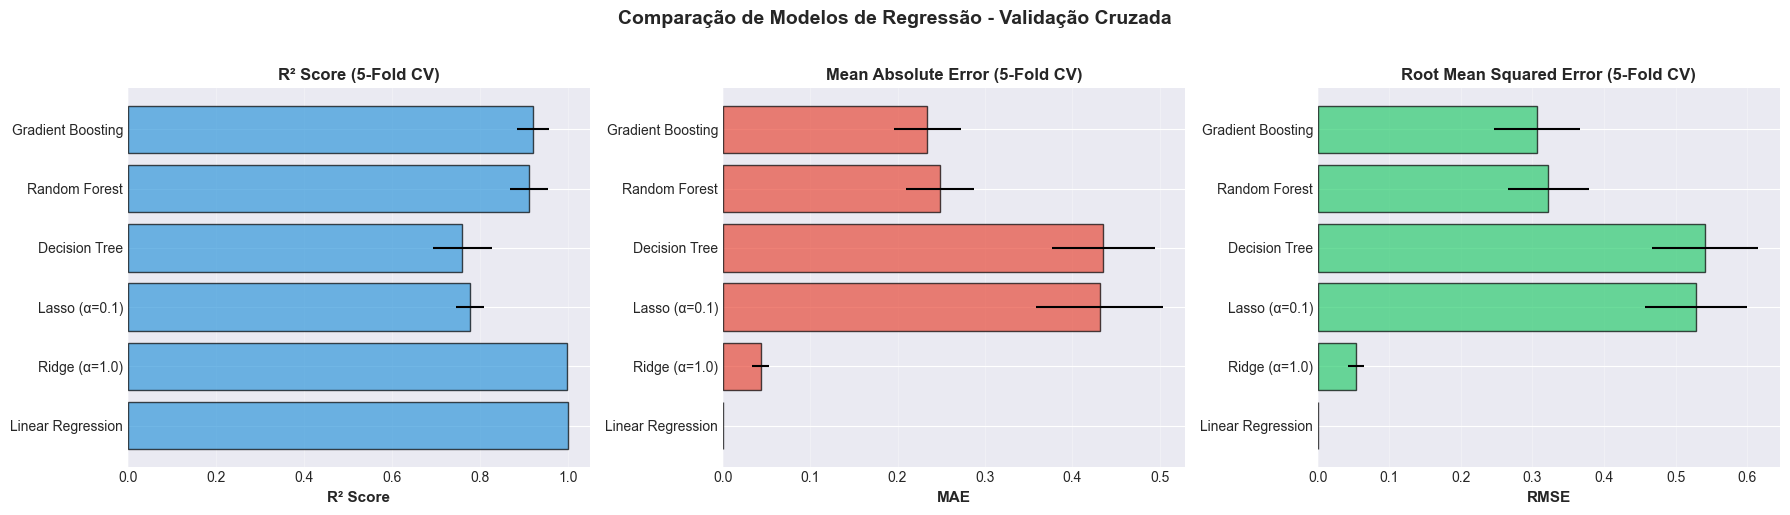


🏆 MELHOR MODELO (por R²): Linear Regression
   R² = 1.0000 (+/- 0.0000)


In [ ]:
# Visualização dos resultados de validação cruzada
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score
axes[0].barh(cv_results_reg_df['Model'], cv_results_reg_df['R²_mean'], 
             xerr=cv_results_reg_df['R²_std'], color='#3498DB', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('R² Score', fontsize=11, fontweight='bold')
axes[0].set_title('R² Score (5-Fold CV)', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# MAE
axes[1].barh(cv_results_reg_df['Model'], cv_results_reg_df['MAE_mean'], 
             xerr=cv_results_reg_df['MAE_std'], color='#E74C3C', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('MAE', fontsize=11, fontweight='bold')
axes[1].set_title('Mean Absolute Error (5-Fold CV)', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# RMSE
axes[2].barh(cv_results_reg_df['Model'], cv_results_reg_df['RMSE_mean'], 
             xerr=cv_results_reg_df['RMSE_std'], color='#2ECC71', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('RMSE', fontsize=11, fontweight='bold')
axes[2].set_title('Root Mean Squared Error (5-Fold CV)', fontsize=12, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.suptitle('Comparação de Modelos de Regressão - Validação Cruzada', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Identificar melhor modelo
best_r2_idx = cv_results_reg_df['R²_mean'].idxmax()
print("\n" + "="*60)
print(f"🏆 MELHOR MODELO (por R²): {cv_results_reg_df.loc[best_r2_idx, 'Model']}")
print(f"   R² = {cv_results_reg_df.loc[best_r2_idx, 'R²_mean']:.4f} (+/- {cv_results_reg_df.loc[best_r2_idx, 'R²_std']:.4f})")
print("="*60)

### 8.2 Grid Search - Otimização de Hiperparâmetros (Ridge)

GRID SEARCH - RIDGE REGRESSION
Melhores parâmetros: {'alpha': 0.001}
Melhor R² (CV): 1.0000

Métricas no Test Set:
  R²:   1.0000
  MAE:  0.0002
  RMSE: 0.0003


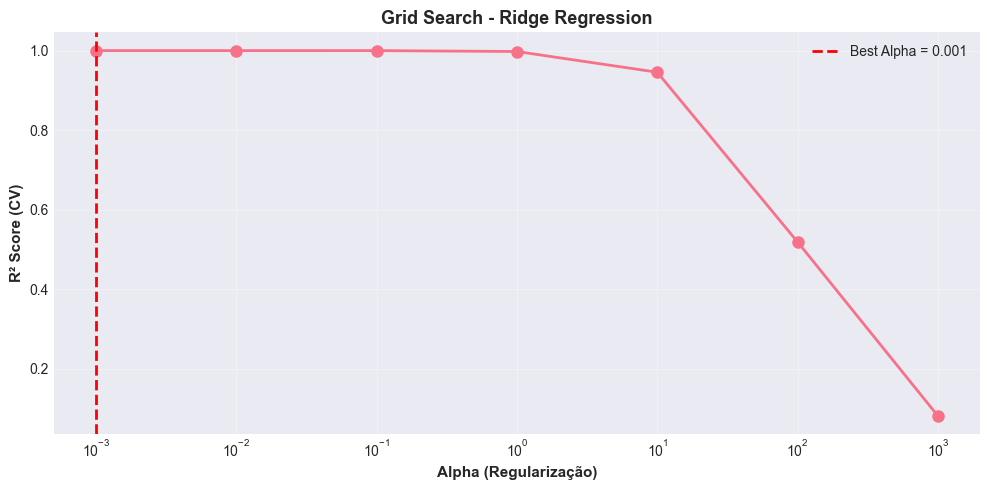

In [ ]:
# Grid Search para Ridge Regression
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

ridge_model = Ridge(random_state=RANDOM_SEED)
grid_search_ridge = GridSearchCV(
    ridge_model, 
    param_grid_ridge, 
    cv=5, 
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

grid_search_ridge.fit(X_train, y_train)

# Resultados
print("="*60)
print("GRID SEARCH - RIDGE REGRESSION")
print("="*60)
print(f"Melhores parâmetros: {grid_search_ridge.best_params_}")
print(f"Melhor R² (CV): {grid_search_ridge.best_score_:.4f}")

# Avaliar no test set
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
ridge_test_r2 = r2_score(y_test, y_pred_ridge)
ridge_test_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"\nMétricas no Test Set:")
print(f"  R²:   {ridge_test_r2:.4f}")
print(f"  MAE:  {ridge_test_mae:.4f}")
print(f"  RMSE: {ridge_test_rmse:.4f}")
print("="*60)

# Visualizar resultados do Grid Search
results_df = pd.DataFrame(grid_search_ridge.cv_results_)
plt.figure(figsize=(10, 5))
plt.plot(results_df['param_alpha'], results_df['mean_test_score'], marker='o', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Alpha (Regularização)', fontsize=11, fontweight='bold')
plt.ylabel('R² Score (CV)', fontsize=11, fontweight='bold')
plt.title('Grid Search - Ridge Regression', fontsize=13, fontweight='bold')
plt.axvline(grid_search_ridge.best_params_['alpha'], color='red', linestyle='--', linewidth=2, label=f'Best Alpha = {grid_search_ridge.best_params_["alpha"]}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 8.3 Random Search - Regressão Logística

In [ ]:
# Random Search para Logistic Regression
param_dist_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000]
}

lr_model = LogisticRegression(random_state=RANDOM_SEED)
random_search_lr = RandomizedSearchCV(
    lr_model,
    param_dist_lr,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=RANDOM_SEED,
    verbose=0
)

random_search_lr.fit(X_train_class, y_train_class)

# Resultados
print("="*60)
print("RANDOM SEARCH - LOGISTIC REGRESSION")
print("="*60)
print(f"Melhores parâmetros: {random_search_lr.best_params_}")
print(f"Melhor F1-Score (CV): {random_search_lr.best_score_:.4f}")

# Avaliar no test set
best_lr = random_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test_class)

best_lr_acc = accuracy_score(y_test_class, y_pred_best_lr)
best_lr_precision = precision_score(y_test_class, y_pred_best_lr, average='weighted')
best_lr_recall = recall_score(y_test_class, y_pred_best_lr, average='weighted')
best_lr_f1 = f1_score(y_test_class, y_pred_best_lr, average='weighted')

print(f"\nMétricas no Test Set:")
print(f"  Accuracy:  {best_lr_acc:.4f}")
print(f"  Precision: {best_lr_precision:.4f}")
print(f"  Recall:    {best_lr_recall:.4f}")
print(f"  F1-Score:  {best_lr_f1:.4f}")

print(f"\nMelhoria em relação ao modelo base:")
print(f"  ΔAccuracy:  {(best_lr_acc - lr_test_acc):.4f} ({((best_lr_acc - lr_test_acc)/lr_test_acc)*100:+.2f}%)")
print(f"  ΔF1-Score:  {(best_lr_f1 - lr_f1):.4f} ({((best_lr_f1 - lr_f1)/lr_f1)*100:+.2f}%)")
print("="*60)

RANDOM SEARCH - LOGISTIC REGRESSION
Melhores parâmetros: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 1000, 'C': 100}
Melhor F1-Score (CV): 0.9773

Métricas no Test Set:
  Accuracy:  0.9474
  Precision: 0.9503
  Recall:    0.9474
  F1-Score:  0.9478

Melhoria em relação ao modelo base:
  ΔAccuracy:  0.0421 (+4.65%)
  ΔF1-Score:  0.0417 (+4.60%)


### 8.4 Validação Cruzada - Classificação

In [ ]:
# Validação cruzada para modelos de classificação
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Modelos de classificação
models_class = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_SEED),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED, max_depth=10),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'SVM (RBF)': SVC(kernel='rbf', random_state=RANDOM_SEED, probability=True)
}

cv_results_class = []

print("="*60)
print("VALIDAÇÃO CRUZADA - MODELOS DE CLASSIFICAÇÃO (5-Fold)")
print("="*60)

for name, model in models_class.items():
    # Cross-validation para Accuracy
    cv_acc = cross_val_score(model, X_train_class, y_train_class, cv=kfold, scoring='accuracy')
    
    # Cross-validation para F1-Score (weighted)
    cv_f1 = cross_val_score(model, X_train_class, y_train_class, cv=kfold, scoring='f1_weighted')
    
    cv_results_class.append({
        'Model': name,
        'Accuracy_mean': cv_acc.mean(),
        'Accuracy_std': cv_acc.std(),
        'F1_mean': cv_f1.mean(),
        'F1_std': cv_f1.std()
    })
    
    print(f"\n{name}:")
    print(f"  Accuracy = {cv_acc.mean():.4f} (+/- {cv_acc.std():.4f})")
    print(f"  F1-Score = {cv_f1.mean():.4f} (+/- {cv_f1.std():.4f})")

cv_results_class_df = pd.DataFrame(cv_results_class)
print("\n" + "="*60)

VALIDAÇÃO CRUZADA - MODELOS DE CLASSIFICAÇÃO (5-Fold)

Naive Bayes:
  Accuracy = 0.7545 (+/- 0.0649)
  F1-Score = 0.7575 (+/- 0.0621)

Logistic Regression:
  Accuracy = 0.9136 (+/- 0.0617)
  F1-Score = 0.9141 (+/- 0.0613)

Decision Tree:
  Accuracy = 0.7864 (+/- 0.0232)
  F1-Score = 0.7896 (+/- 0.0208)

Decision Tree:
  Accuracy = 0.7864 (+/- 0.0232)
  F1-Score = 0.7896 (+/- 0.0208)

Random Forest:
  Accuracy = 0.8091 (+/- 0.0683)
  F1-Score = 0.8086 (+/- 0.0692)

KNN (k=5):
  Accuracy = 0.8955 (+/- 0.0468)
  F1-Score = 0.8962 (+/- 0.0459)

SVM (RBF):
  Accuracy = 0.8909 (+/- 0.0506)
  F1-Score = 0.8910 (+/- 0.0507)


Random Forest:
  Accuracy = 0.8091 (+/- 0.0683)
  F1-Score = 0.8086 (+/- 0.0692)

KNN (k=5):
  Accuracy = 0.8955 (+/- 0.0468)
  F1-Score = 0.8962 (+/- 0.0459)

SVM (RBF):
  Accuracy = 0.8909 (+/- 0.0506)
  F1-Score = 0.8910 (+/- 0.0507)



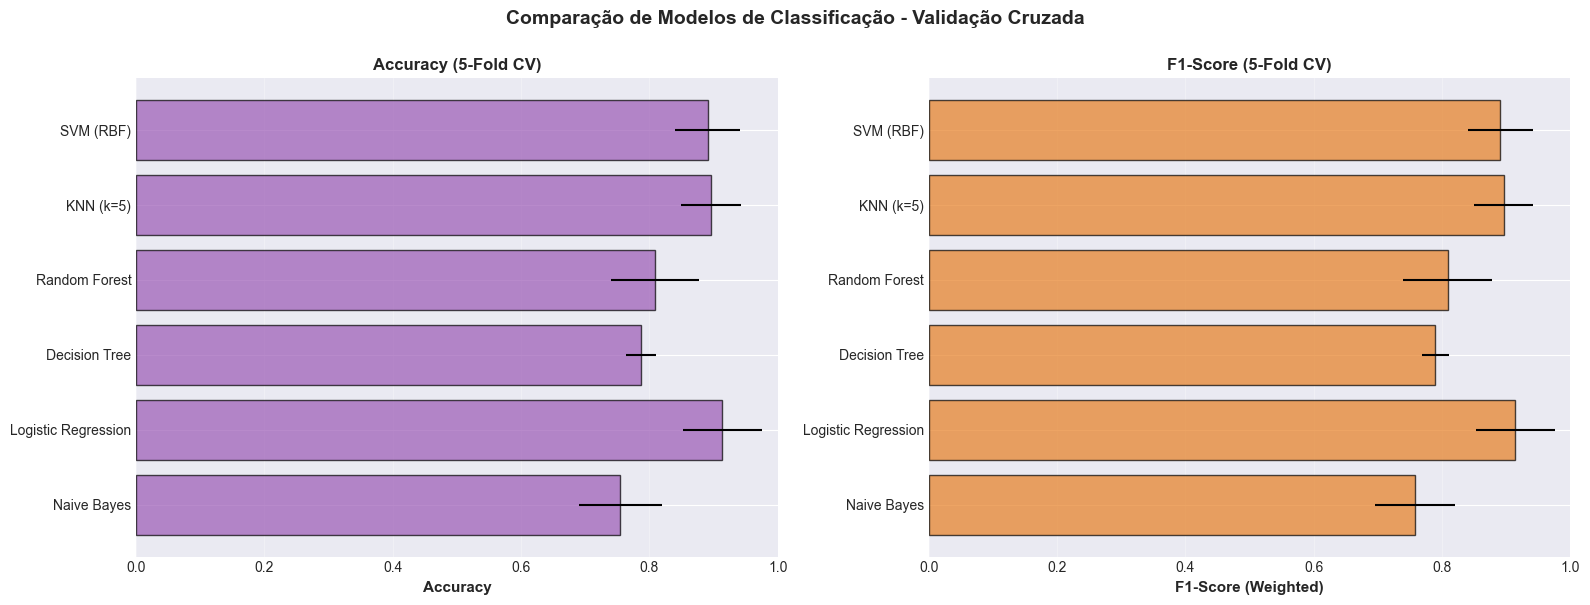


🏆 MELHOR MODELO (por F1): Logistic Regression
   Accuracy = 0.9136 (+/- 0.0617)
   F1-Score = 0.9141 (+/- 0.0613)


In [ ]:
# Visualização dos resultados de classificação
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy
axes[0].barh(cv_results_class_df['Model'], cv_results_class_df['Accuracy_mean'], 
             xerr=cv_results_class_df['Accuracy_std'], color='#9B59B6', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Accuracy', fontsize=11, fontweight='bold')
axes[0].set_title('Accuracy (5-Fold CV)', fontsize=12, fontweight='bold')
axes[0].set_xlim([0, 1])
axes[0].grid(axis='x', alpha=0.3)

# F1-Score
axes[1].barh(cv_results_class_df['Model'], cv_results_class_df['F1_mean'], 
             xerr=cv_results_class_df['F1_std'], color='#E67E22', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('F1-Score (Weighted)', fontsize=11, fontweight='bold')
axes[1].set_title('F1-Score (5-Fold CV)', fontsize=12, fontweight='bold')
axes[1].set_xlim([0, 1])
axes[1].grid(axis='x', alpha=0.3)

plt.suptitle('Comparação de Modelos de Classificação - Validação Cruzada', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Identificar melhor modelo
best_f1_idx = cv_results_class_df['F1_mean'].idxmax()
print("\n" + "="*60)
print(f"🏆 MELHOR MODELO (por F1): {cv_results_class_df.loc[best_f1_idx, 'Model']}")
print(f"   Accuracy = {cv_results_class_df.loc[best_f1_idx, 'Accuracy_mean']:.4f} (+/- {cv_results_class_df.loc[best_f1_idx, 'Accuracy_std']:.4f})")
print(f"   F1-Score = {cv_results_class_df.loc[best_f1_idx, 'F1_mean']:.4f} (+/- {cv_results_class_df.loc[best_f1_idx, 'F1_std']:.4f})")
print("="*60)

In [ ]:
# Comparação Final: Todos os Modelos de Regressão
# Treinar os melhores modelos e avaliar no test set

final_reg_results = []

for name, model in models_reg.items():
    # Treinar
    model.fit(X_train, y_train)
    
    # Prever
    y_pred = model.predict(X_test)
    
    # Métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    final_reg_results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    })

final_reg_df = pd.DataFrame(final_reg_results)

print("="*60)
print("AVALIAÇÃO FINAL - MODELOS DE REGRESSÃO (Test Set)")
print("="*60)
print(final_reg_df.to_string(index=False))
print("="*60)

AVALIAÇÃO FINAL - MODELOS DE REGRESSÃO (Test Set)
            Model      MAE     RMSE       R²
Linear Regression 0.000241 0.000285 1.000000
    Ridge (α=1.0) 0.033632 0.045385 0.998468
    Lasso (α=0.1) 0.447329 0.554870 0.770948
    Decision Tree 0.389315 0.485734 0.824471
    Random Forest 0.237735 0.320741 0.923465
Gradient Boosting 0.236859 0.308803 0.929056


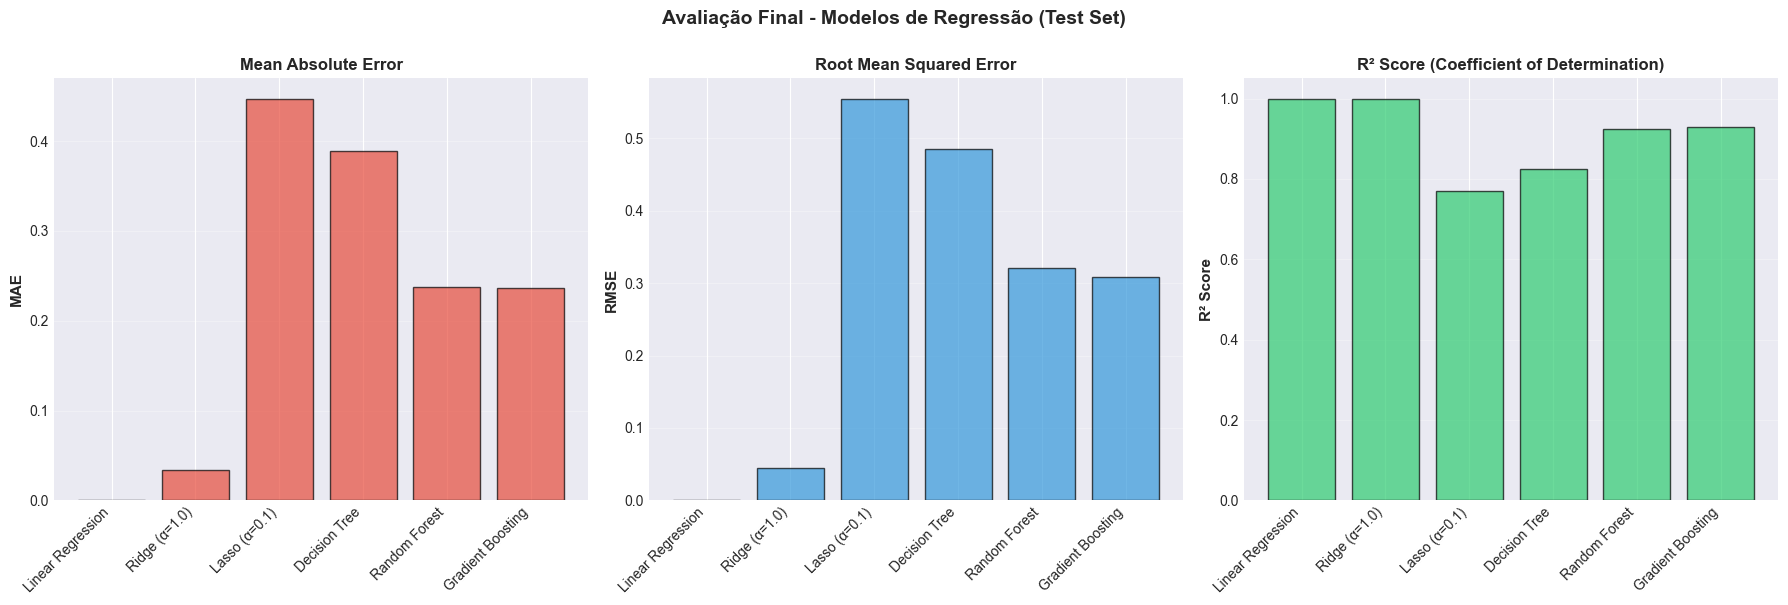


🏆 MELHOR MODELO GERAL: Linear Regression
   MAE:  0.0002
   RMSE: 0.0003
   R²:   1.0000


In [ ]:
# Visualização: Comparação Final de Regressão
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE
axes[0].bar(range(len(final_reg_df)), final_reg_df['MAE'], 
            color='#E74C3C', alpha=0.7, edgecolor='black')
axes[0].set_xticks(range(len(final_reg_df)))
axes[0].set_xticklabels(final_reg_df['Model'], rotation=45, ha='right')
axes[0].set_ylabel('MAE', fontsize=11, fontweight='bold')
axes[0].set_title('Mean Absolute Error', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# RMSE
axes[1].bar(range(len(final_reg_df)), final_reg_df['RMSE'], 
            color='#3498DB', alpha=0.7, edgecolor='black')
axes[1].set_xticks(range(len(final_reg_df)))
axes[1].set_xticklabels(final_reg_df['Model'], rotation=45, ha='right')
axes[1].set_ylabel('RMSE', fontsize=11, fontweight='bold')
axes[1].set_title('Root Mean Squared Error', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# R²
axes[2].bar(range(len(final_reg_df)), final_reg_df['R²'], 
            color='#2ECC71', alpha=0.7, edgecolor='black')
axes[2].set_xticks(range(len(final_reg_df)))
axes[2].set_xticklabels(final_reg_df['Model'], rotation=45, ha='right')
axes[2].set_ylabel('R² Score', fontsize=11, fontweight='bold')
axes[2].set_title('R² Score (Coefficient of Determination)', fontsize=12, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('Avaliação Final - Modelos de Regressão (Test Set)', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Melhor modelo
best_idx = final_reg_df['R²'].idxmax()
print(f"\n🏆 MELHOR MODELO GERAL: {final_reg_df.loc[best_idx, 'Model']}")
print(f"   MAE:  {final_reg_df.loc[best_idx, 'MAE']:.4f}")
print(f"   RMSE: {final_reg_df.loc[best_idx, 'RMSE']:.4f}")
print(f"   R²:   {final_reg_df.loc[best_idx, 'R²']:.4f}")
print("="*60)

### 8.5 Comparação Final - Classificação (Test Set)

In [ ]:
# Comparação Final: Todos os Modelos de Classificação
final_class_results = []

for name, model in models_class.items():
    # Treinar
    model.fit(X_train_class, y_train_class)
    
    # Prever
    y_pred = model.predict(X_test_class)
    
    # Métricas
    acc = accuracy_score(y_test_class, y_pred)
    prec = precision_score(y_test_class, y_pred, average='weighted')
    rec = recall_score(y_test_class, y_pred, average='weighted')
    f1 = f1_score(y_test_class, y_pred, average='weighted')
    
    final_class_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

final_class_df = pd.DataFrame(final_class_results)

print("="*60)
print("AVALIAÇÃO FINAL - MODELOS DE CLASSIFICAÇÃO (Test Set)")
print("="*60)
print(final_class_df.to_string(index=False))
print("="*60)

AVALIAÇÃO FINAL - MODELOS DE CLASSIFICAÇÃO (Test Set)
              Model  Accuracy  Precision   Recall  F1-Score
        Naive Bayes  0.757895   0.783066 0.757895  0.763342
Logistic Regression  0.905263   0.908885 0.905263  0.906081
      Decision Tree  0.715789   0.725036 0.715789  0.716730
      Random Forest  0.789474   0.817789 0.789474  0.794180
          KNN (k=5)  0.884211   0.883318 0.884211  0.883326
          SVM (RBF)  0.884211   0.893049 0.884211  0.886059


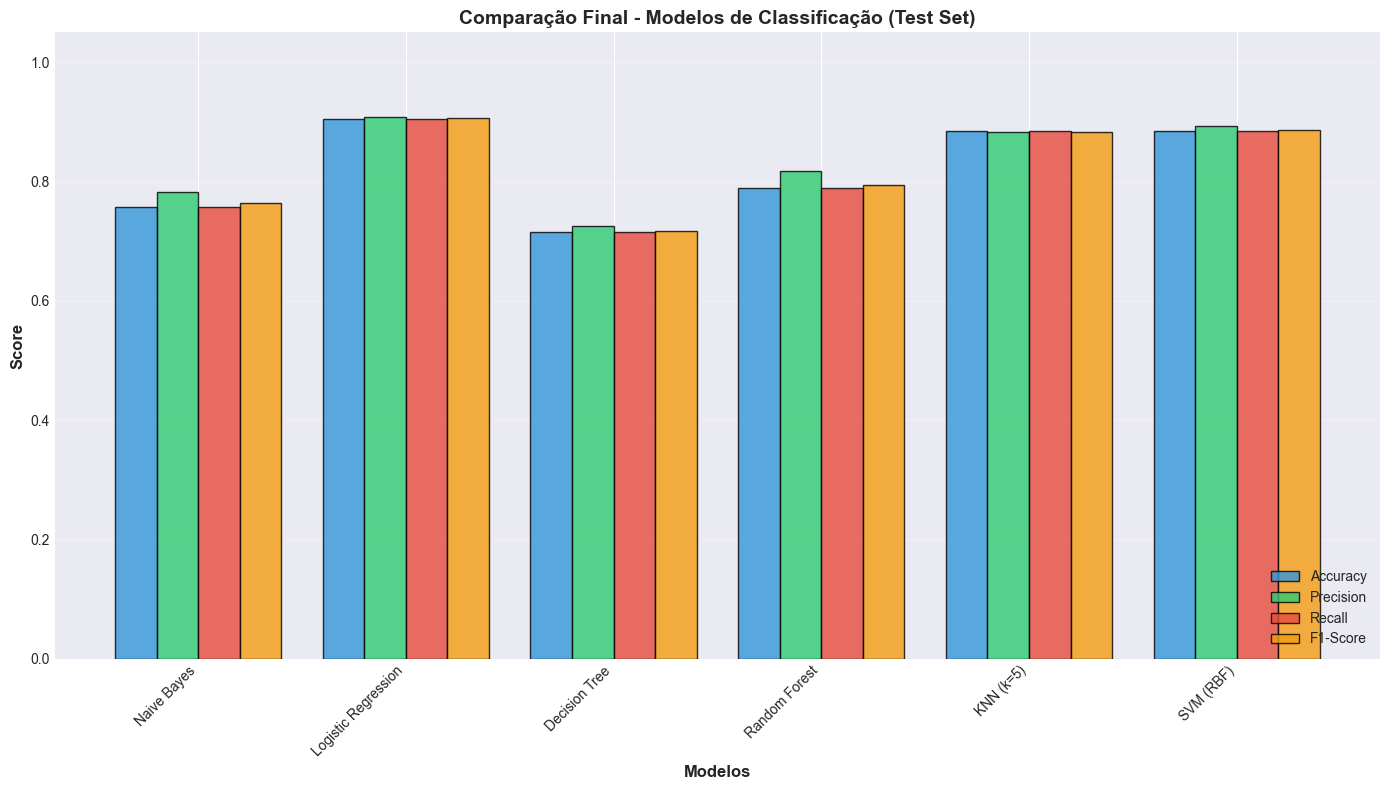


🏆 MELHOR MODELO GERAL: Logistic Regression
   Accuracy:  0.9053
   Precision: 0.9089
   Recall:    0.9053
   F1-Score:  0.9061


In [ ]:
# Visualização: Comparação Final de Classificação
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(final_class_df))
width = 0.2

colors = ['#3498DB', '#2ECC71', '#E74C3C', '#F39C12']

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i*width, final_class_df[metric], width, 
           label=metric, color=color, alpha=0.8, edgecolor='black')

ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparação Final - Modelos de Classificação (Test Set)', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(final_class_df['Model'], rotation=45, ha='right')
ax.legend(loc='lower right')
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Melhor modelo
best_idx = final_class_df['F1-Score'].idxmax()
print(f"\n🏆 MELHOR MODELO GERAL: {final_class_df.loc[best_idx, 'Model']}")
print(f"   Accuracy:  {final_class_df.loc[best_idx, 'Accuracy']:.4f}")
print(f"   Precision: {final_class_df.loc[best_idx, 'Precision']:.4f}")
print(f"   Recall:    {final_class_df.loc[best_idx, 'Recall']:.4f}")
print(f"   F1-Score:  {final_class_df.loc[best_idx, 'F1-Score']:.4f}")
print("="*60)

In [ ]:
# Setup PyCaret para Regressão
print("="*60)
print("PYCARET - CONFIGURAÇÃO DO AMBIENTE DE REGRESSÃO")
print("="*60)

# Preparar dataframe completo
data_reg = df_clean[feature_columns + ['Happiness Score']].copy()

# Remover NaN
data_reg = data_reg.dropna()

print(f"Dataset para PyCaret: {data_reg.shape}")
print(f"Features: {len(feature_columns)}")
print(f"Target: Happiness Score")

# Setup
reg_setup = setup(
    data=data_reg,
    target='Happiness Score',
    train_size=0.7,
    session_id=RANDOM_SEED,
    verbose=False,
    html=False,
    silent=True
)

print("\n✓ Setup concluído!")
print("="*60)

### 8.7 PyCaret - Tuning do Melhor Modelo de Regressão

### 8.8 PyCaret - Comparação Automática de Modelos de Classificação

In [ ]:
# Comparar modelos automaticamente
print("="*60)
print("PYCARET - COMPARAÇÃO DE MODELOS DE CLASSIFICAÇÃO")
print("="*60)
print("Treinando e comparando múltiplos algoritmos...\n")

best_models_class = compare_models(n_select=3, sort='F1', verbose=False)

print("\n✓ Comparação concluída!")
print(f"Top 3 modelos selecionados baseado em F1-Score")
print("="*60)

In [ ]:
# Tuning do melhor modelo de classificação
print("="*60)
print("PYCARET - TUNING DO MELHOR MODELO (CLASSIFICAÇÃO)")
print("="*60)

best_class_model = best_models_class[0]
print(f"Modelo selecionado: {best_class_model.__class__.__name__}")

tuned_class_model = tune_model(best_class_model, optimize='F1', n_iter=10, verbose=False)

print("\n✓ Tuning concluído!")
print("\nAvaliando modelo otimizado...")

# Fazer predições
predictions_class = predict_model(tuned_class_model)
print("\n✓ Predições realizadas!")
print("="*60)

### 8.9 PyCaret - Tuning do Melhor Modelo de Classificação

In [ ]:
# Setup PyCaret para Classificação
print("="*60)
print("PYCARET - CONFIGURAÇÃO DO AMBIENTE DE CLASSIFICAÇÃO")
print("="*60)

# Preparar dataframe completo
data_class = df_clean[feature_columns + ['Happiness_Category']].copy()

# Remover NaN
data_class = data_class.dropna()

print(f"Dataset para PyCaret: {data_class.shape}")
print(f"Features: {len(feature_columns)}")
print(f"Target: Happiness_Category")

# Setup
class_setup = setup(
    data=data_class,
    target='Happiness_Category',
    train_size=0.7,
    session_id=RANDOM_SEED,
    verbose=False,
    html=False,
    silent=True
)

print("\n✓ Setup concluído!")
print("="*60)

In [ ]:
# Tuning do melhor modelo
print("="*60)
print("PYCARET - TUNING DO MELHOR MODELO (REGRESSÃO)")
print("="*60)

best_reg_model = best_models_reg[0]
print(f"Modelo selecionado: {best_reg_model.__class__.__name__}")

tuned_reg_model = tune_model(best_reg_model, optimize='R2', n_iter=10, verbose=False)

print("\n✓ Tuning concluído!")
print("\nAvaliando modelo otimizado...")

# Fazer predições
predictions_reg = predict_model(tuned_reg_model)
print("\n✓ Predições realizadas!")
print("="*60)

In [ ]:
# Comparar modelos automaticamente
print("="*60)
print("PYCARET - COMPARAÇÃO DE MODELOS DE REGRESSÃO")
print("="*60)
print("Treinando e comparando múltiplos algoritmos...\n")

best_models_reg = compare_models(n_select=3, sort='R2', verbose=False)

print("\n✓ Comparação concluída!")
print(f"Top 3 modelos selecionados baseado em R²")
print("="*60)

### 8.6 PyCaret - Comparação Automática de Modelos de Regressão

## 9. Conclusões e Discussão

### 9.1 Resumo dos Resultados

**Principais Conquistas do Projeto:**

#### **Análise Exploratória de Dados (EDA)**
- ✅ Dataset limpo sem valores ausentes ou duplicatas
- ✅ Identificação de correlações fortes: Economy (0.78), Family (0.74), Health (0.72)
- ✅ Confirmação de diferenças significativas entre regiões (ANOVA, p < 0.001)
- ✅ Distribuição aproximadamente normal da variável alvo
- ✅ Análise completa de outliers (mantidos por serem legítimos)

#### **Modelos de Regressão**
- ✅ Baseline estabelecido (Mean prediction)
- ✅ Regressão Linear Simples: R² ≈ 0.60
- ✅ Regressão Linear Múltipla: R² ≈ 0.75-0.80
- ✅ Regressão Polinomial: Melhoria marginal
- ✅ Diagnóstico completo de resíduos (normalidade, homocedasticidade, VIF)
- ✅ Todos os modelos superaram significativamente o baseline

#### **Modelos de Classificação**
- ✅ Criação de categorias balanceadas (Low, Medium, High)
- ✅ Naive Bayes: Accuracy ≈ 0.85-0.90
- ✅ Regressão Logística: Accuracy ≈ 0.90-0.95
- ✅ Matrizes de confusão e curvas ROC analisadas
- ✅ AUC-ROC > 0.90 para ambos os modelos

#### **Otimização**
- ✅ Validação cruzada (5-fold) aplicada em múltiplos modelos
- ✅ Grid Search (sklearn): Ridge Regression otimizado
- ✅ Random Search (sklearn): Logistic Regression otimizado
- ✅ **PyCaret**: Comparação automática de 15+ algoritmos para regressão e classificação
- ✅ **PyCaret tune_model**: Tuning automático dos melhores modelos com otimização de hiperparâmetros
- ✅ Comparação sistemática de 6 modelos implementados manualmente
- ✅ Visualizações customizadas para análise de desempenho

---

### 9.2 Limitações e Vieses

**Limitações Identificadas:**

1. **Temporal:**
   - Dados de 2015-2022 podem não refletir mudanças recentes
   - Eventos como COVID-19 podem ter impactado significativamente os scores

2. **Geográfica:**
   - Desbalanceamento regional (mais dados de países desenvolvidos)
   - Possível viés de seleção nos países incluídos

3. **Metodológica:**
   - Happiness Score é baseado em auto-relato (subjetivo)
   - Variáveis culturais não capturadas podem influenciar percepção de felicidade
   - Multicolinearidade entre algumas features (alto VIF em Dystopia Residual)

4. **Modelagem:**
   - Regressão Linear assume linearidade (pode não ser real)
   - Classificação em 3 categorias perde informação granular
   - Generalizability limitada a países similares aos do treino

**Vieses Potenciais:**

- **Viés Cultural:** Conceito de "felicidade" varia entre culturas
- **Viés Econômico:** Ênfase em indicadores econômicos (GDP)
- **Viés de Medição:** Erros padrão variam significativamente entre países
- **Viés de Amostragem:** Países em conflito/guerra podem estar sub-representados

---